In [1]:
install.packages("tswge")
library("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Applied Time Series Analysis - Lab 1**
David Huang

released 03/06/2021

The discussion paper for this lab was written by Holly Ching Yu Lam, Andy Haines, Glenn McGregor, Emily Ying Yang Chan, and Shakoor Hajat. The accessed study can be found cited (with a link) at the bottom of this report-like ipynb file.

## **A brief summary of their objective, methods, and results:**

The researchers in this studied the El Nino Southern Oscillation (ENSO), which is a major driver of climatic variability, and explored its link to the rates of people affected by natural disasters (PAD) on a global-, regional-, and country-level scale. This area is especially important to study as ENSO can have "reaching consequences for public health globally," as indicated in the paper. 

The researchers found PAD rates, percentages of people that were affected, by using data from the EM-DAT International Disaster Database to compare relationships between the Oceanic Nino Index (ONI) and the multivariate El Nino Index (MEI).

Most of these PAD were affected by floods, droughts, or storms, which was up to 95%, with 3/4ths of these PAD being in Asia--primarily, Southern Asia. The research found that these rates of floods were significantly higher during the time of El Nino.

## **Loading the data**

Loading ONI data

In [2]:
# Loading ONI data

oni.url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni.name <- tail(unlist(strsplit(oni.url, "/")), n=1)
oni.file <- paste("/tmp/", oni.name, sep="")
download.file(oni.url, oni.file, method = 'auto')

oni.df <- read.table(oni.file, header = TRUE)

# get subsets
DJF <- subset(oni.df, SEAS == 'DJF') # ONI
print(DJF)
oni.sub <- subset(DJF, YR > 1963 & YR < 2018)
print(oni.sub)

# put ANOM subsection into time series
oni.ts <- ts(oni.sub$ANOM, start = c(1950, 1), frequency = 1)
print(oni.ts)

    SEAS   YR TOTAL  ANOM
1    DJF 1950 24.72 -1.53
13   DJF 1951 25.42 -0.82
25   DJF 1952 26.78  0.53
37   DJF 1953 26.65  0.40
49   DJF 1954 27.00  0.76
61   DJF 1955 25.57 -0.68
73   DJF 1956 25.23 -1.11
85   DJF 1957 26.09 -0.25
97   DJF 1958 28.15  1.81
109  DJF 1959 26.95  0.61
121  DJF 1960 26.24 -0.10
133  DJF 1961 26.34  0.04
145  DJF 1962 26.05 -0.24
157  DJF 1963 25.89 -0.40
169  DJF 1964 27.36  1.07
181  DJF 1965 25.69 -0.59
193  DJF 1966 27.72  1.37
205  DJF 1967 26.01 -0.41
217  DJF 1968 25.78 -0.64
229  DJF 1969 27.54  1.13
241  DJF 1970 26.93  0.51
253  DJF 1971 25.10 -1.36
265  DJF 1972 25.77 -0.71
277  DJF 1973 28.32  1.84
289  DJF 1974 24.64 -1.84
301  DJF 1975 25.94 -0.54
313  DJF 1976 24.90 -1.56
325  DJF 1977 27.18  0.71
337  DJF 1978 27.15  0.69
349  DJF 1979 26.50  0.03
361  DJF 1980 27.06  0.59
373  DJF 1981 26.32 -0.26
385  DJF 1982 26.56 -0.05
397  DJF 1983 28.79  2.18
409  DJF 1984 26.01 -0.60
421  DJF 1985 25.56 -1.04
433  DJF 1986 26.05 -0.49
445  DJF 198

Loading MEI data

In [3]:
# Loading MEI data

mei.url <- "https://psl.noaa.gov/enso/mei.old/table.html"
mei.name <- tail(unlist(strsplit(mei.url, "/")), n=1)
mei.file <- paste("/tmp/", mei.name, sep="")
download.file(mei.url, mei.file, method = 'auto')

a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^YEAR.*", my.line)
  if (length(a) > 0) {
    my.cols <- unlist(strsplit(my.line, "\\s+"))
  }
}

n.cols <- length(my.cols)
mei.df <- data.frame(matrix(ncol = n.cols, nrow = 0))
colnames(mei.df) <- my.cols 

a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^[0-9].*", my.line)
  if (length(a) > 0) {
    my.data <- unlist(strsplit(my.line, "\\s+"))
    num.data <- length(my.data)
    if (num.data == n.cols) {
      my.values <- c()
      for (d in my.data) {
        my.values <- append(my.values, as.numeric(d))
      }
      mei.df[nrow(mei.df)+1,] = my.values
    }
  }
}

# subset we need
mei.sub <- subset(mei.df, YEAR > 1963 & YEAR < 2018)
print(mei.sub)

# put into time series
# mei.ts <- ts(as.vector(t(mei.df[,2:length(my.cols)])), start = c(1950, 1), frequency = 1)
# use subset to get DECJAN
mei.ts <- ts(mei.sub$DECJAN, start = 1964, frequency = 1) # MEI
print(mei.ts)

   YEAR DECJAN JANFEB FEBMAR MARAPR APRMAY MAYJUN JUNJUL JULAUG AUGSEP SEPOCT
15 1964  0.878  0.481 -0.256 -0.545 -1.234 -1.150 -1.384 -1.486 -1.309 -1.216
16 1965 -0.536 -0.329 -0.259  0.086  0.464  0.867  1.367  1.425  1.379  1.202
17 1966  1.307  1.186  0.689  0.515 -0.178 -0.193 -0.116  0.152 -0.094 -0.050
18 1967 -0.462 -0.898 -1.050 -1.030 -0.448 -0.236 -0.492 -0.391 -0.627 -0.677
19 1968 -0.602 -0.727 -0.635 -0.944 -1.093 -0.812 -0.503 -0.104  0.213  0.424
20 1969  0.670  0.849  0.458  0.622  0.674  0.801  0.490  0.212  0.162  0.496
21 1970  0.380  0.432  0.228  0.014 -0.099 -0.636 -1.055 -1.007 -1.251 -1.088
22 1971 -1.204 -1.507 -1.790 -1.839 -1.429 -1.420 -1.207 -1.213 -1.467 -1.415
23 1972 -0.575 -0.398 -0.256 -0.166  0.423  0.966  1.826  1.800  1.522  1.617
24 1973  1.723  1.515  0.870  0.491 -0.099 -0.758 -1.056 -1.334 -1.734 -1.660
25 1974 -1.912 -1.768 -1.743 -1.620 -1.048 -0.694 -0.750 -0.664 -0.628 -1.050
26 1975 -0.522 -0.576 -0.850 -0.927 -0.838 -1.148 -1.497 -1.712 

Loading PAD data

In [4]:
# Loading PAD data
# download this from https://public.emdat.be/data

pad.file <- "./emdat_public2.csv"
pad.df.all <- read.csv(pad.file, header=TRUE, skip=6)
cols.interest <- c("Country", "ISO", "Start.Year", "Start.Month", 
                   "End.Year", "End.Month", "Total.Affected")
print(cols.interest)

pad.df <- pad.df.all[cols.interest]
print(pad.df)

Streaming output truncated to the last 5000 lines.
7240            7     2003         7           3748
7241            8     2003         8         155147
7242            8     2003         8           1156
7243            8     2003         9          34289
7244            5     2003         5             21
7245            8     2003         8            600
7246            8     2003         8             NA
7247            8     2003         9         150000
7248            7     2003         7            600
7249            4     2003         7             NA
7250           10     2003        10           7016
7251            3     2007        NA        1000000
7252           11     2003        11             50
7253            5     2003         5            178
7254            8     2003         8           7769
7255           10     2003        10             90
7256            6     2003         7          50000
7257            5     2003         5             NA
7258         

Loading populations for world countries, from the World Bank

In [5]:
# Loading populations for world countries, from the World Bank

wbank.url <- "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
wbank.name <- "world_bank.zip"
wbank.file <- paste("/tmp/", wbank.name, sep="")
download.file(wbank.url, wbank.file)
unzip(zipfile = wbank.file, exdir = "/tmp")

my.file <- ""
for (tmp.file in list.files("/tmp")){
  a <- grep("^API_SP.POP.TOTL.*csv", tmp.file)
  if (length(a) > 0) {
    my.file <- tmp.file
  }
}

wb.file <- paste("/tmp/", my.file, sep="")
wb.df <- read.csv(wb.file, header = TRUE, skip = 4)

print(wb.df)

                                            Country.Name Country.Code
1                                                  Aruba          ABW
2                                            Afghanistan          AFG
3                                                 Angola          AGO
4                                                Albania          ALB
5                                                Andorra          AND
6                                             Arab World          ARB
7                                   United Arab Emirates          ARE
8                                              Argentina          ARG
9                                                Armenia          ARM
10                                        American Samoa          ASM
11                                   Antigua and Barbuda          ATG
12                                             Australia          AUS
13                                               Austria          AUT
14                  

Add population counts to PAD dataframe

In [6]:
for (i in 1:nrow(pad.df)) {
  tmp.iso <- pad.df[i, ][['ISO']]
  tmp.year <- pad.df[i, ][['Start.Year']]
  tmp.col <- paste("X", tmp.year, sep="")
  a <- match(tmp.iso, wb.df$Country.Code)
  if (!is.na(a)) {
    tmp.pop <- wb.df[,tmp.col][a]
    pad.df[i, 'POP'] = tmp.pop
    #print(c(tmp.iso, tmp.year, tmp.pop))
  } else {
    # assign missing values; fill holes
    pad.df[i, 'POP'] = NA
    #print(paste("Could not match", tmp.iso))
  }
}

print(pad.df)

                                                         Country ISO Start.Year
1                                                          India IND       1964
2                                                     Bangladesh BGD       1964
3                                                     Bangladesh BGD       1964
4                                                         Brazil BRA       1964
5                                                         Brazil BRA       1964
6                                                         Brazil BRA       1964
7                                                          China CHN       1964
8                                                           Cuba CUB       1964
9                                       Dominican Republic (the) DOM       1964
10                                                       Ecuador ECU       1964
11                                                          Fiji FJI       1964
12                                      

cont. adding population counts to PAD dataframe (get PAD per 1000 people)

In [7]:
# calculate pad per 1k people
years <- sort(unique(pad.df$Start.Year))

pads <- list()
denom <- list() # this would be the current
for (year in 1:length(years)){
  # get total impacted in year
  pad.sub <- subset(pad.df, Start.Year == years[year])
  counter1 <- 0
  for (i in 1:nrow(pad.sub)){
    if (!is.na(pad.sub$Total.Affected[i]) & !is.na(pad.sub$POP[i])) {
      my.ta <- pad.sub$Total.Affected[i]
      counter1 <- counter1 + my.ta
    }
  }
  pads[year] <- counter1

  # Calculate (per 1000) PAD for year[year]
  counter2 <- 0
  for (my.iso in unique(pad.sub$ISO)){
    #print(my.iso)
    a <- match(my.iso, pad.sub$ISO)
    counter2 <- pad.sub$POP[a]
    if (!is.na(tmp.pop)) {
      counter2 <- counter2 + tmp.pop
    }
  }
  denom[year] = counter2
  
}
pads <- unlist(pads, use.names=FALSE)
denom <- unlist(denom, use.names=FALSE)

# our calculated values (vector, not a single var)
pad.per1000 <- (pads/counter2)*1000 # counter 2 is per year!
print(pad.per1000)

 [1]   92837.33 1511973.02  147511.19   75860.83  325186.93  117954.19
 [7]  539488.77  114274.89 2672102.25  146347.97  554230.12  628905.96
[13]  219641.35  331983.33  667962.93  747215.98  909072.69  392237.20
[19] 1847092.39 1288750.99  781451.16  299029.45  385275.53 4605939.05
[25] 2259291.64 2117624.57 1006999.88 3493538.29  831651.39 2112890.77
[31] 3362991.90 2720140.55 2642585.26  851399.79 4182789.43 3389298.71
[37] 2114923.09 1213816.45 8110208.66 3091528.05 1955347.25 1897520.43
[43] 1503777.09 2605456.40 2147787.93 2417913.24 3115155.60 2600138.03
[49] 1485340.11 1133098.43 1698202.73 5194449.54 2515116.81 1154932.81


In [8]:
# set options for ALL of the rest (until reset)
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 150)

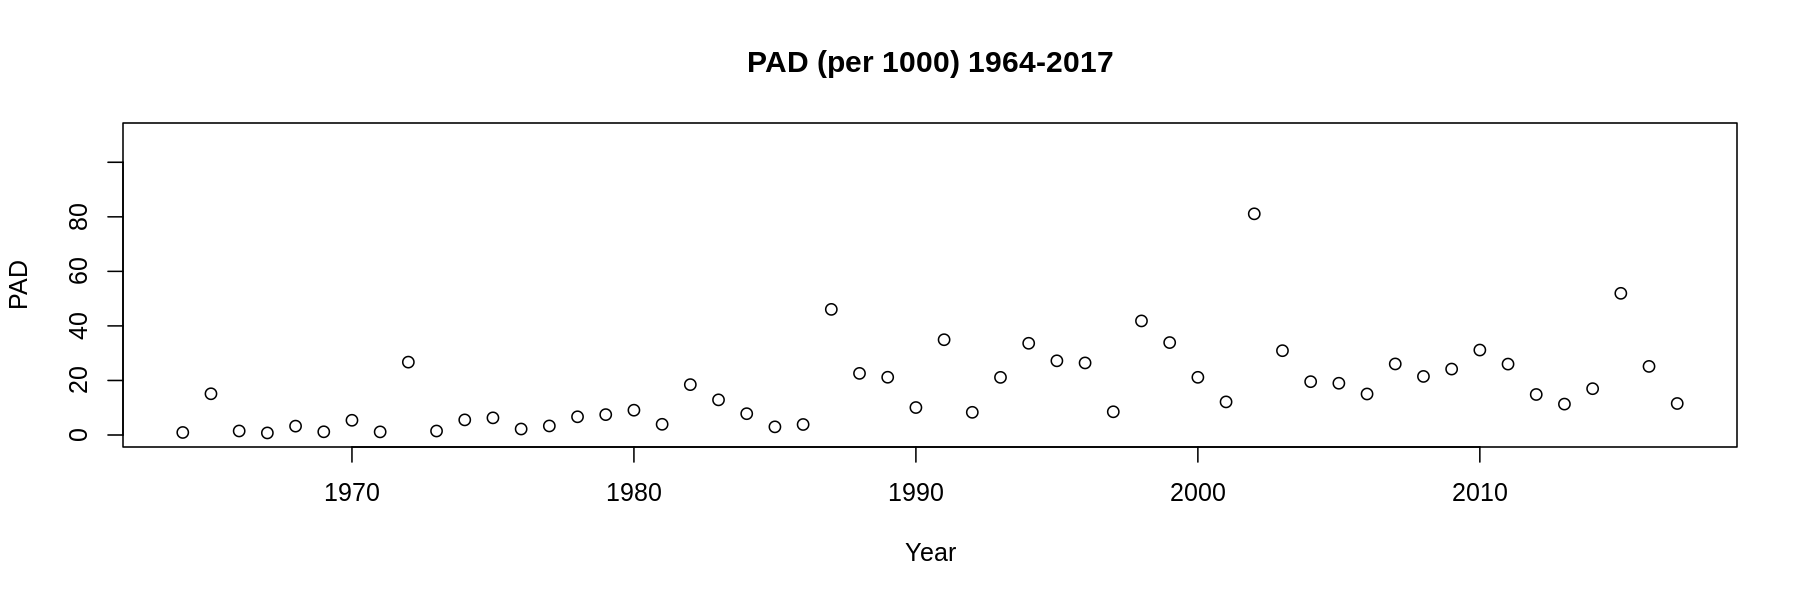

In [9]:
# plotting PAD

pad.ts <- ts(pad.per1000/100000, start = 1964, frequency = 1) # divide by 1000 to scale it down 
# some sort of scaling issue??? not sure
# this scaling lets us fit the graph better with the y-axis' labels, etc. especially since it is per 1000


plot(pad.ts, ylab = "PAD", xlab = "Year", ylim = c(0,110), type = 'n', main = 'PAD (per 1000) 1964-2017') # 0, 110 to scale it down
points(pad.ts)

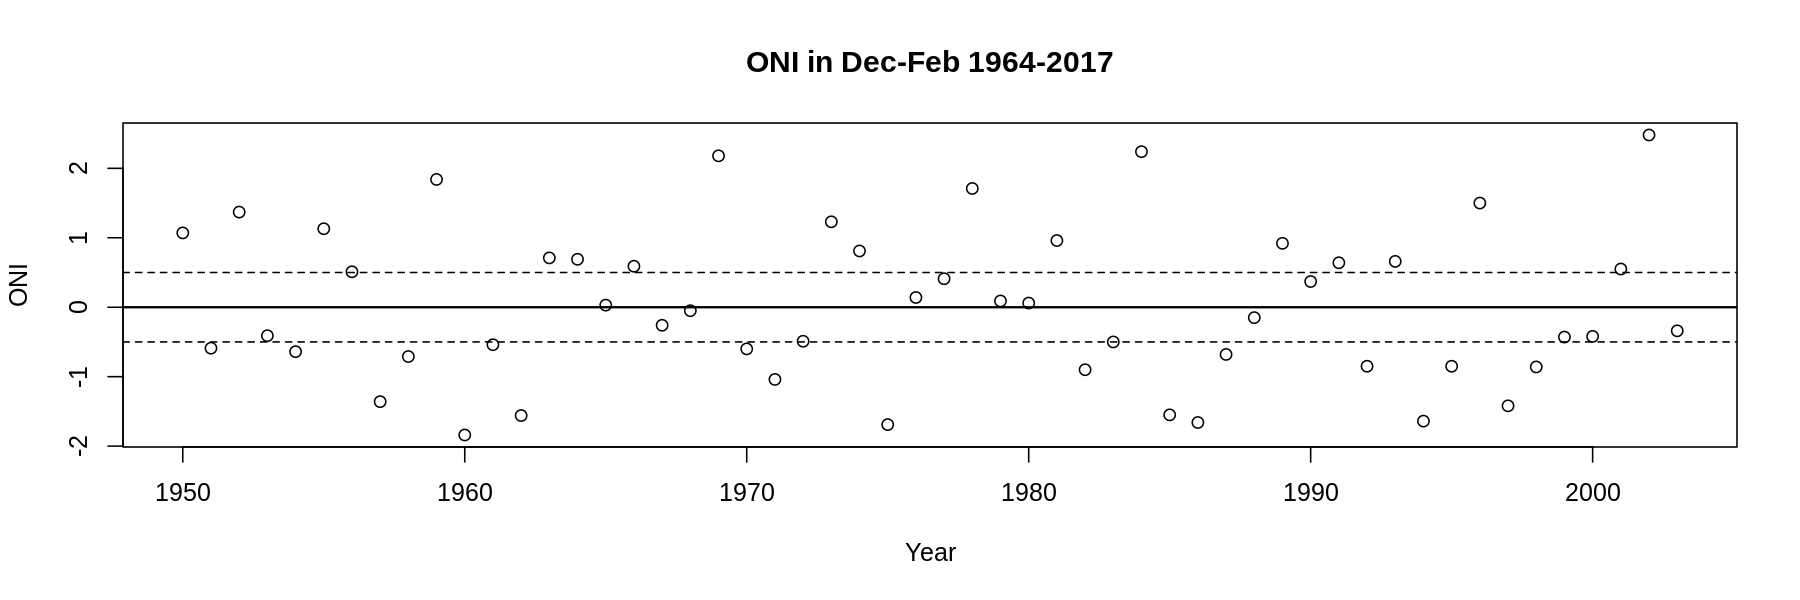

In [10]:
# plotting ONI

plot(oni.ts, ylab = "ONI", xlab = "Year", main = 'ONI in Dec-Feb 1964-2017', type = 'n')
points(oni.ts)

# lines
abline(h = 0, lwd = 1.5)
abline(h = 0.5, lty = 2)
abline(h = -0.5, lty = 2)

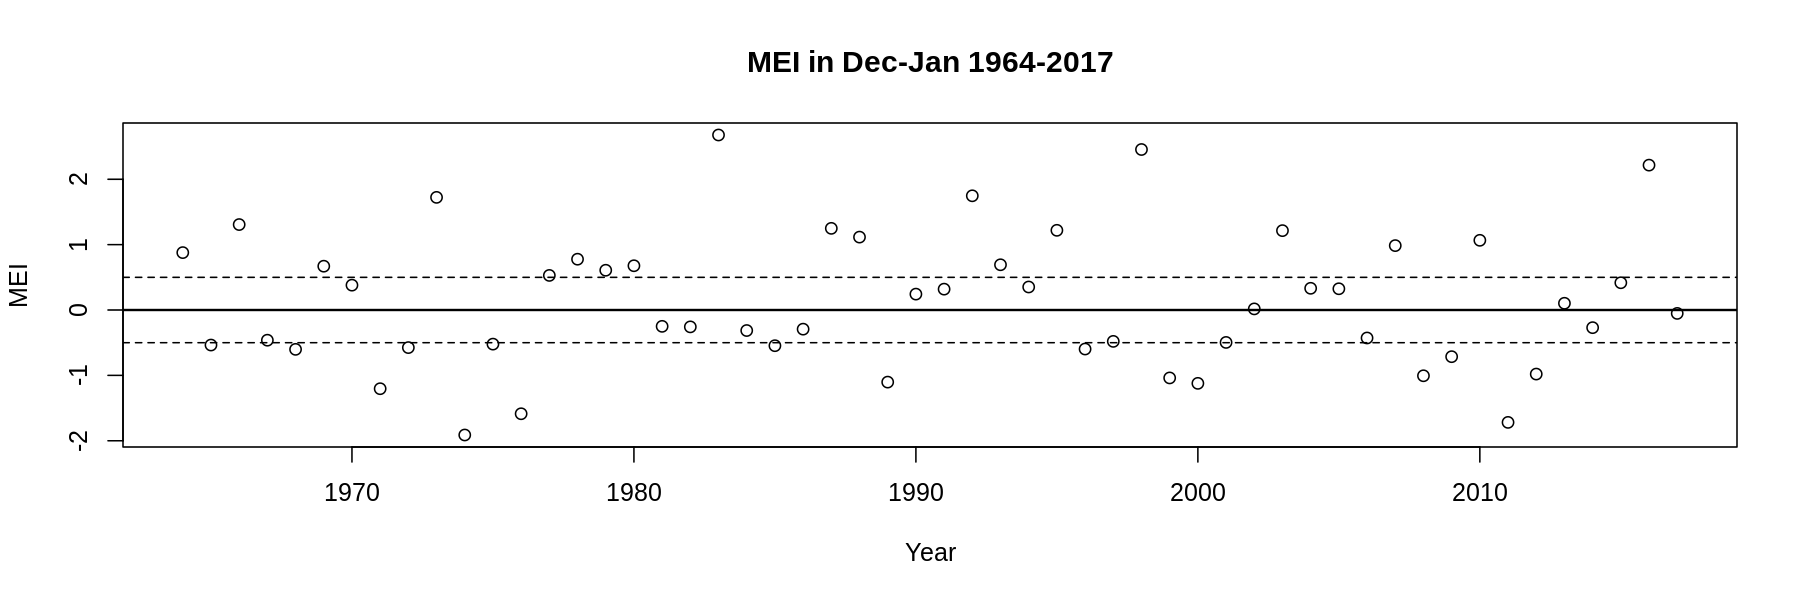

In [11]:
# plotting MEI

plot(mei.ts, ylab = "MEI", xlab = "Year", main = "MEI in Dec-Jan 1964-2017", type = 'n')
points(mei.ts)

# lines
abline(h=0, lwd = 1.5)
abline(h = 0.5, lty = 2)
abline(h = -0.5, lty = 2)

In [12]:
# now to set options back to something I like (allows us to expand a little bit)
options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 150)

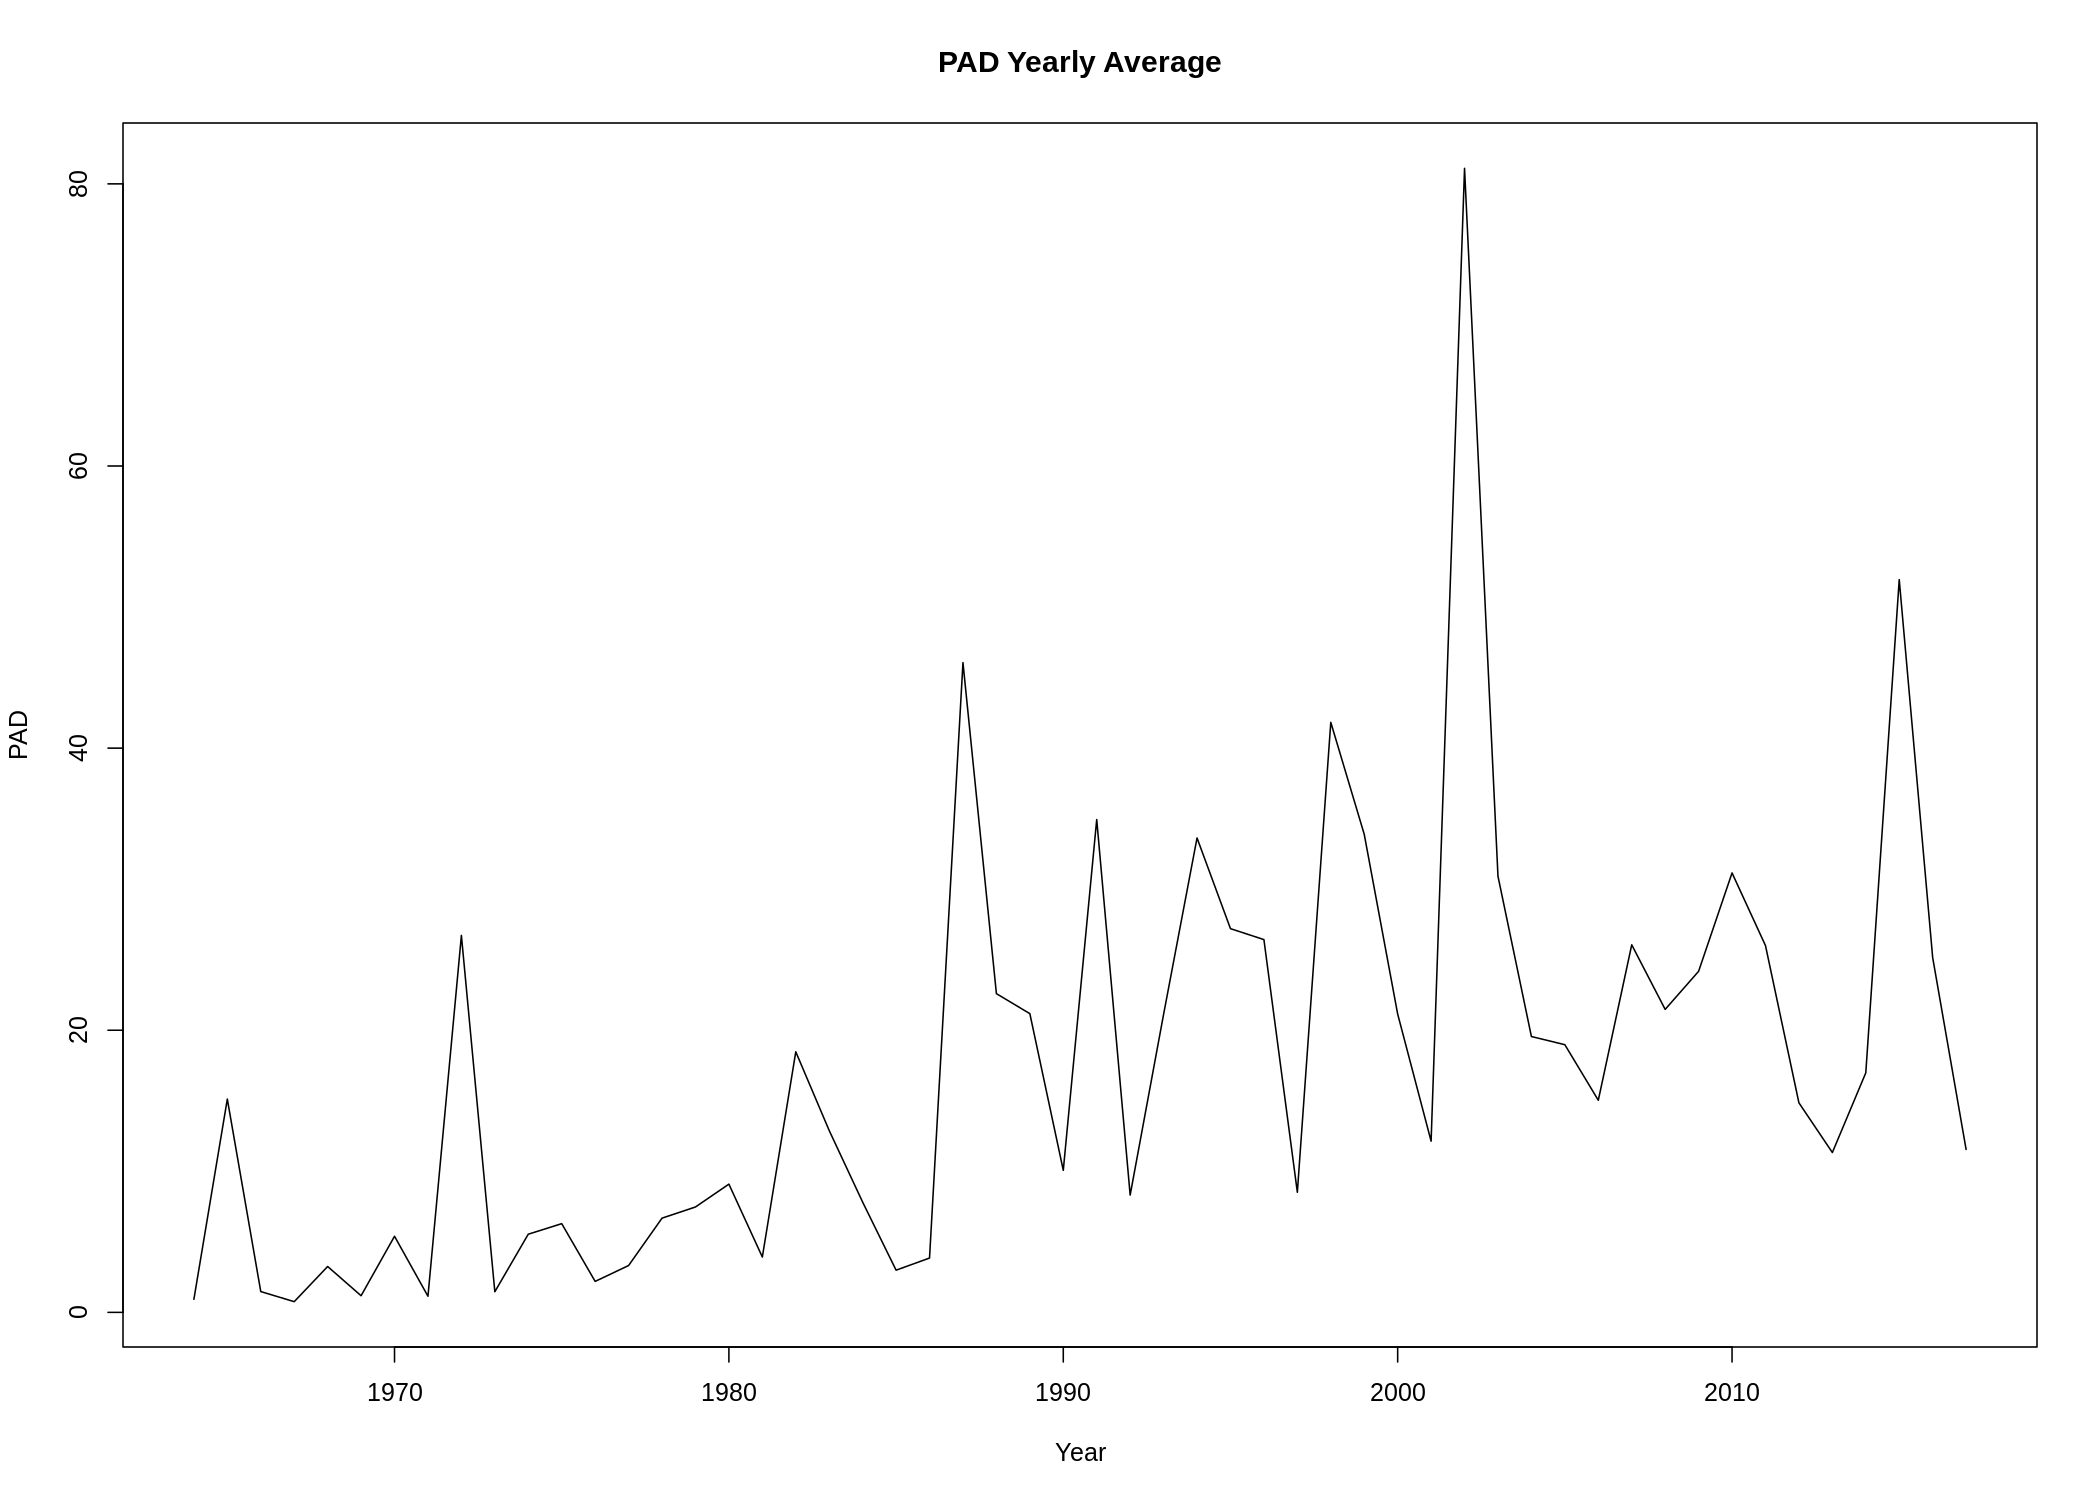

In [13]:
plot(pad.ts, xlab = "Year", ylab = "PAD", main = "PAD Yearly Average")

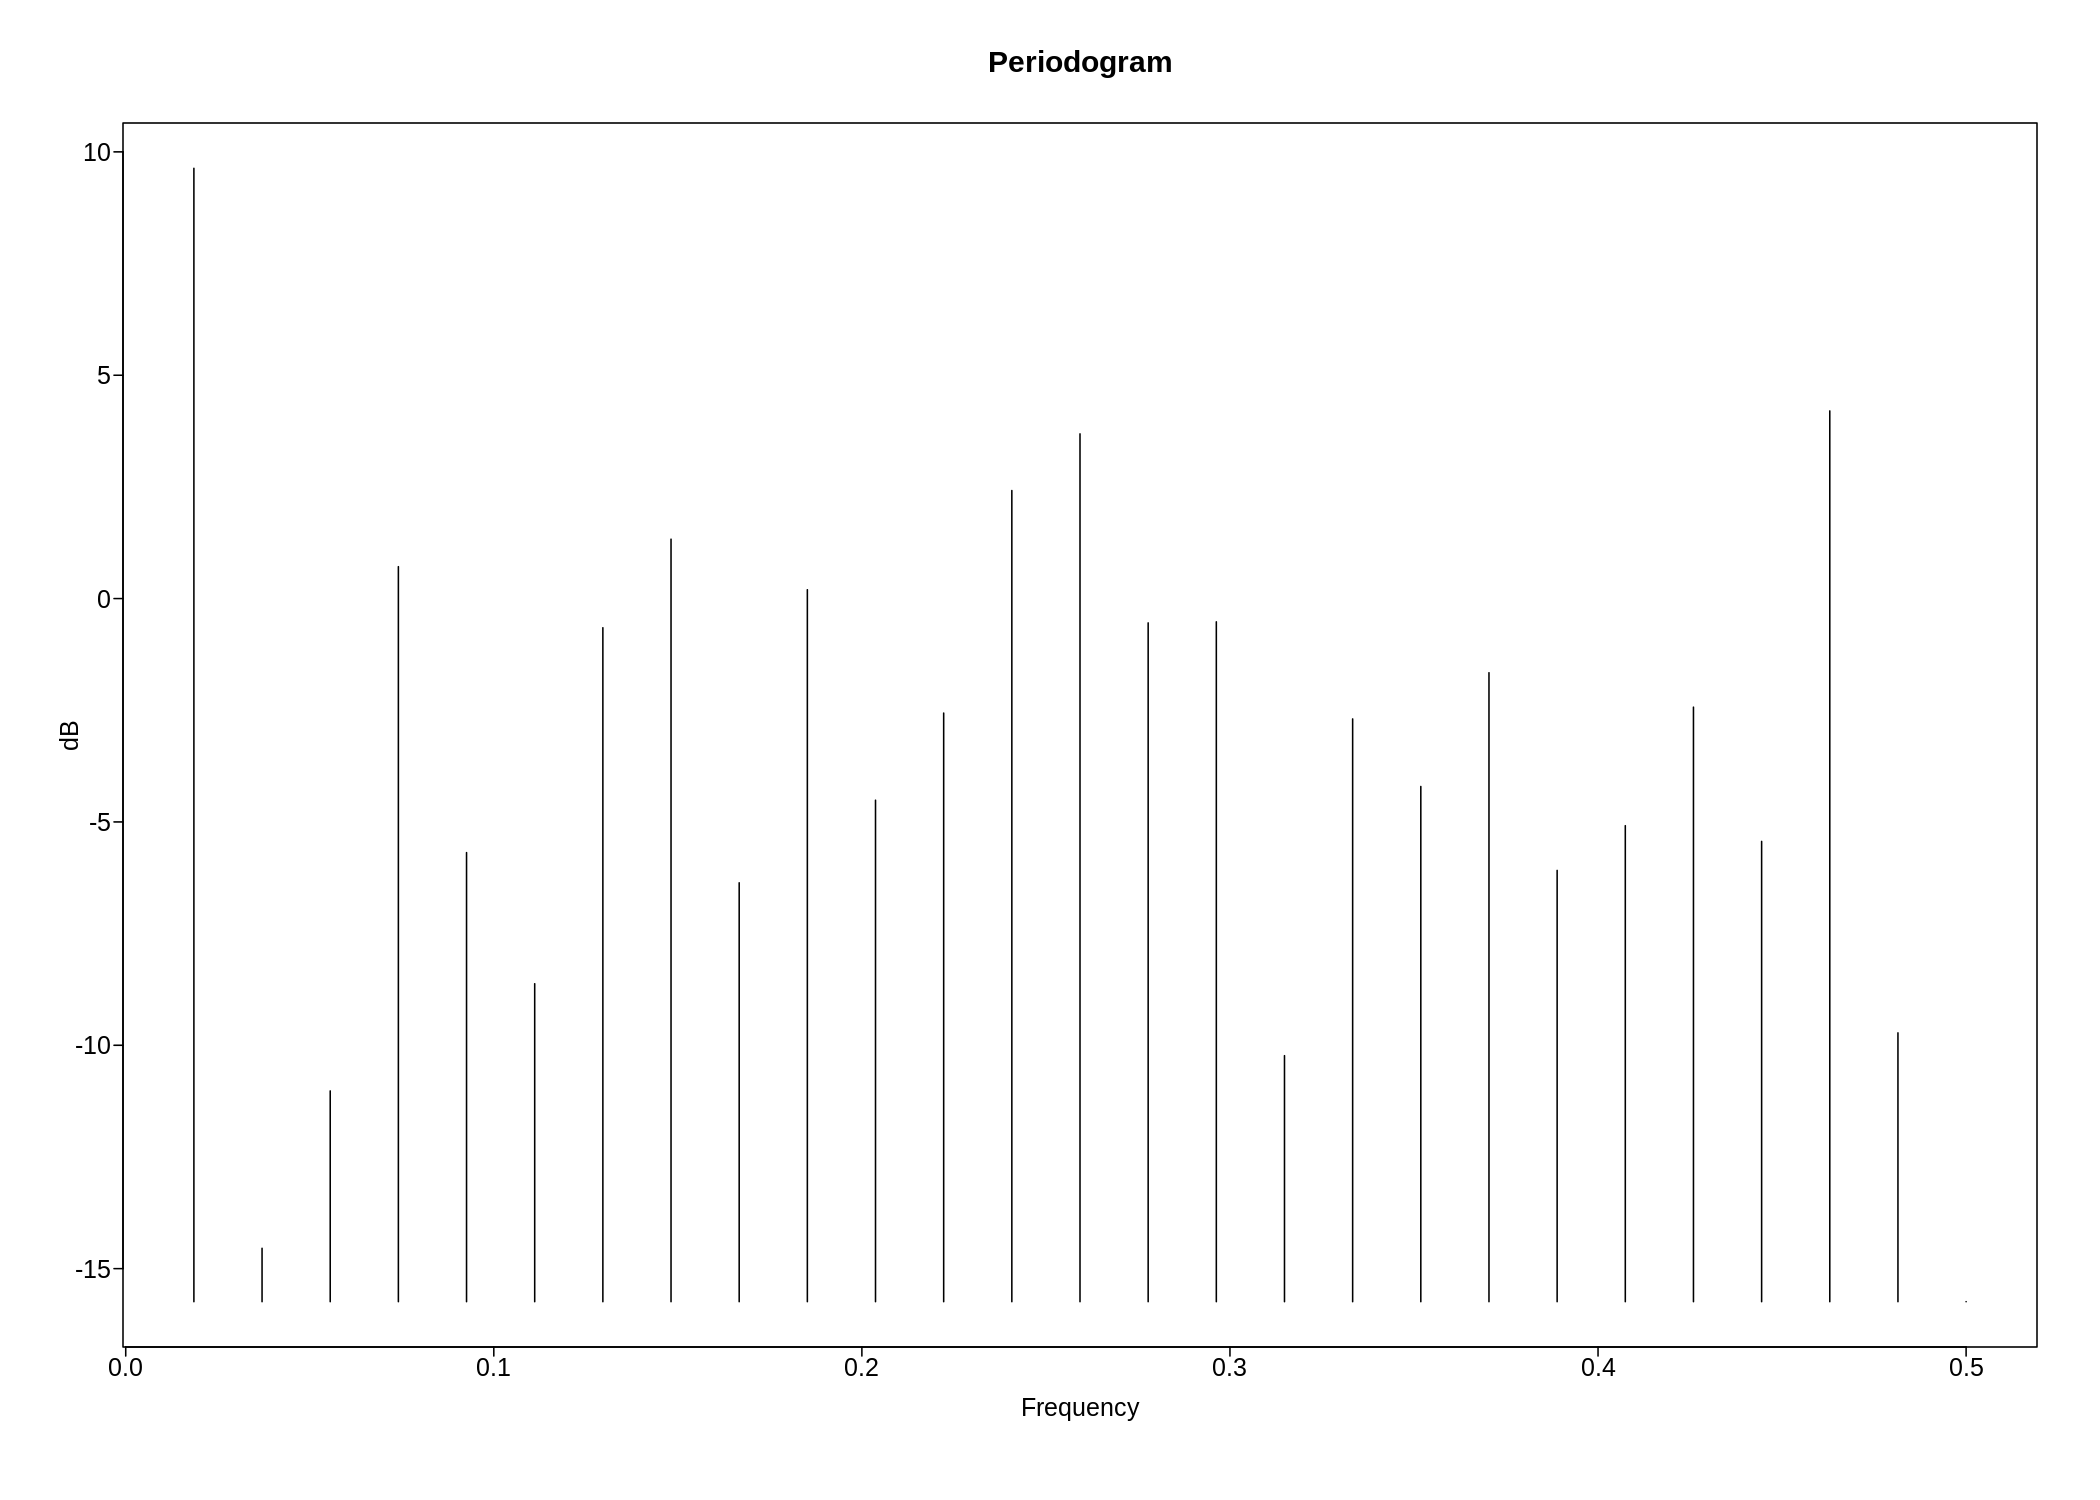

In [14]:
periodogram <- period.wge(pad.ts, plot = TRUE)

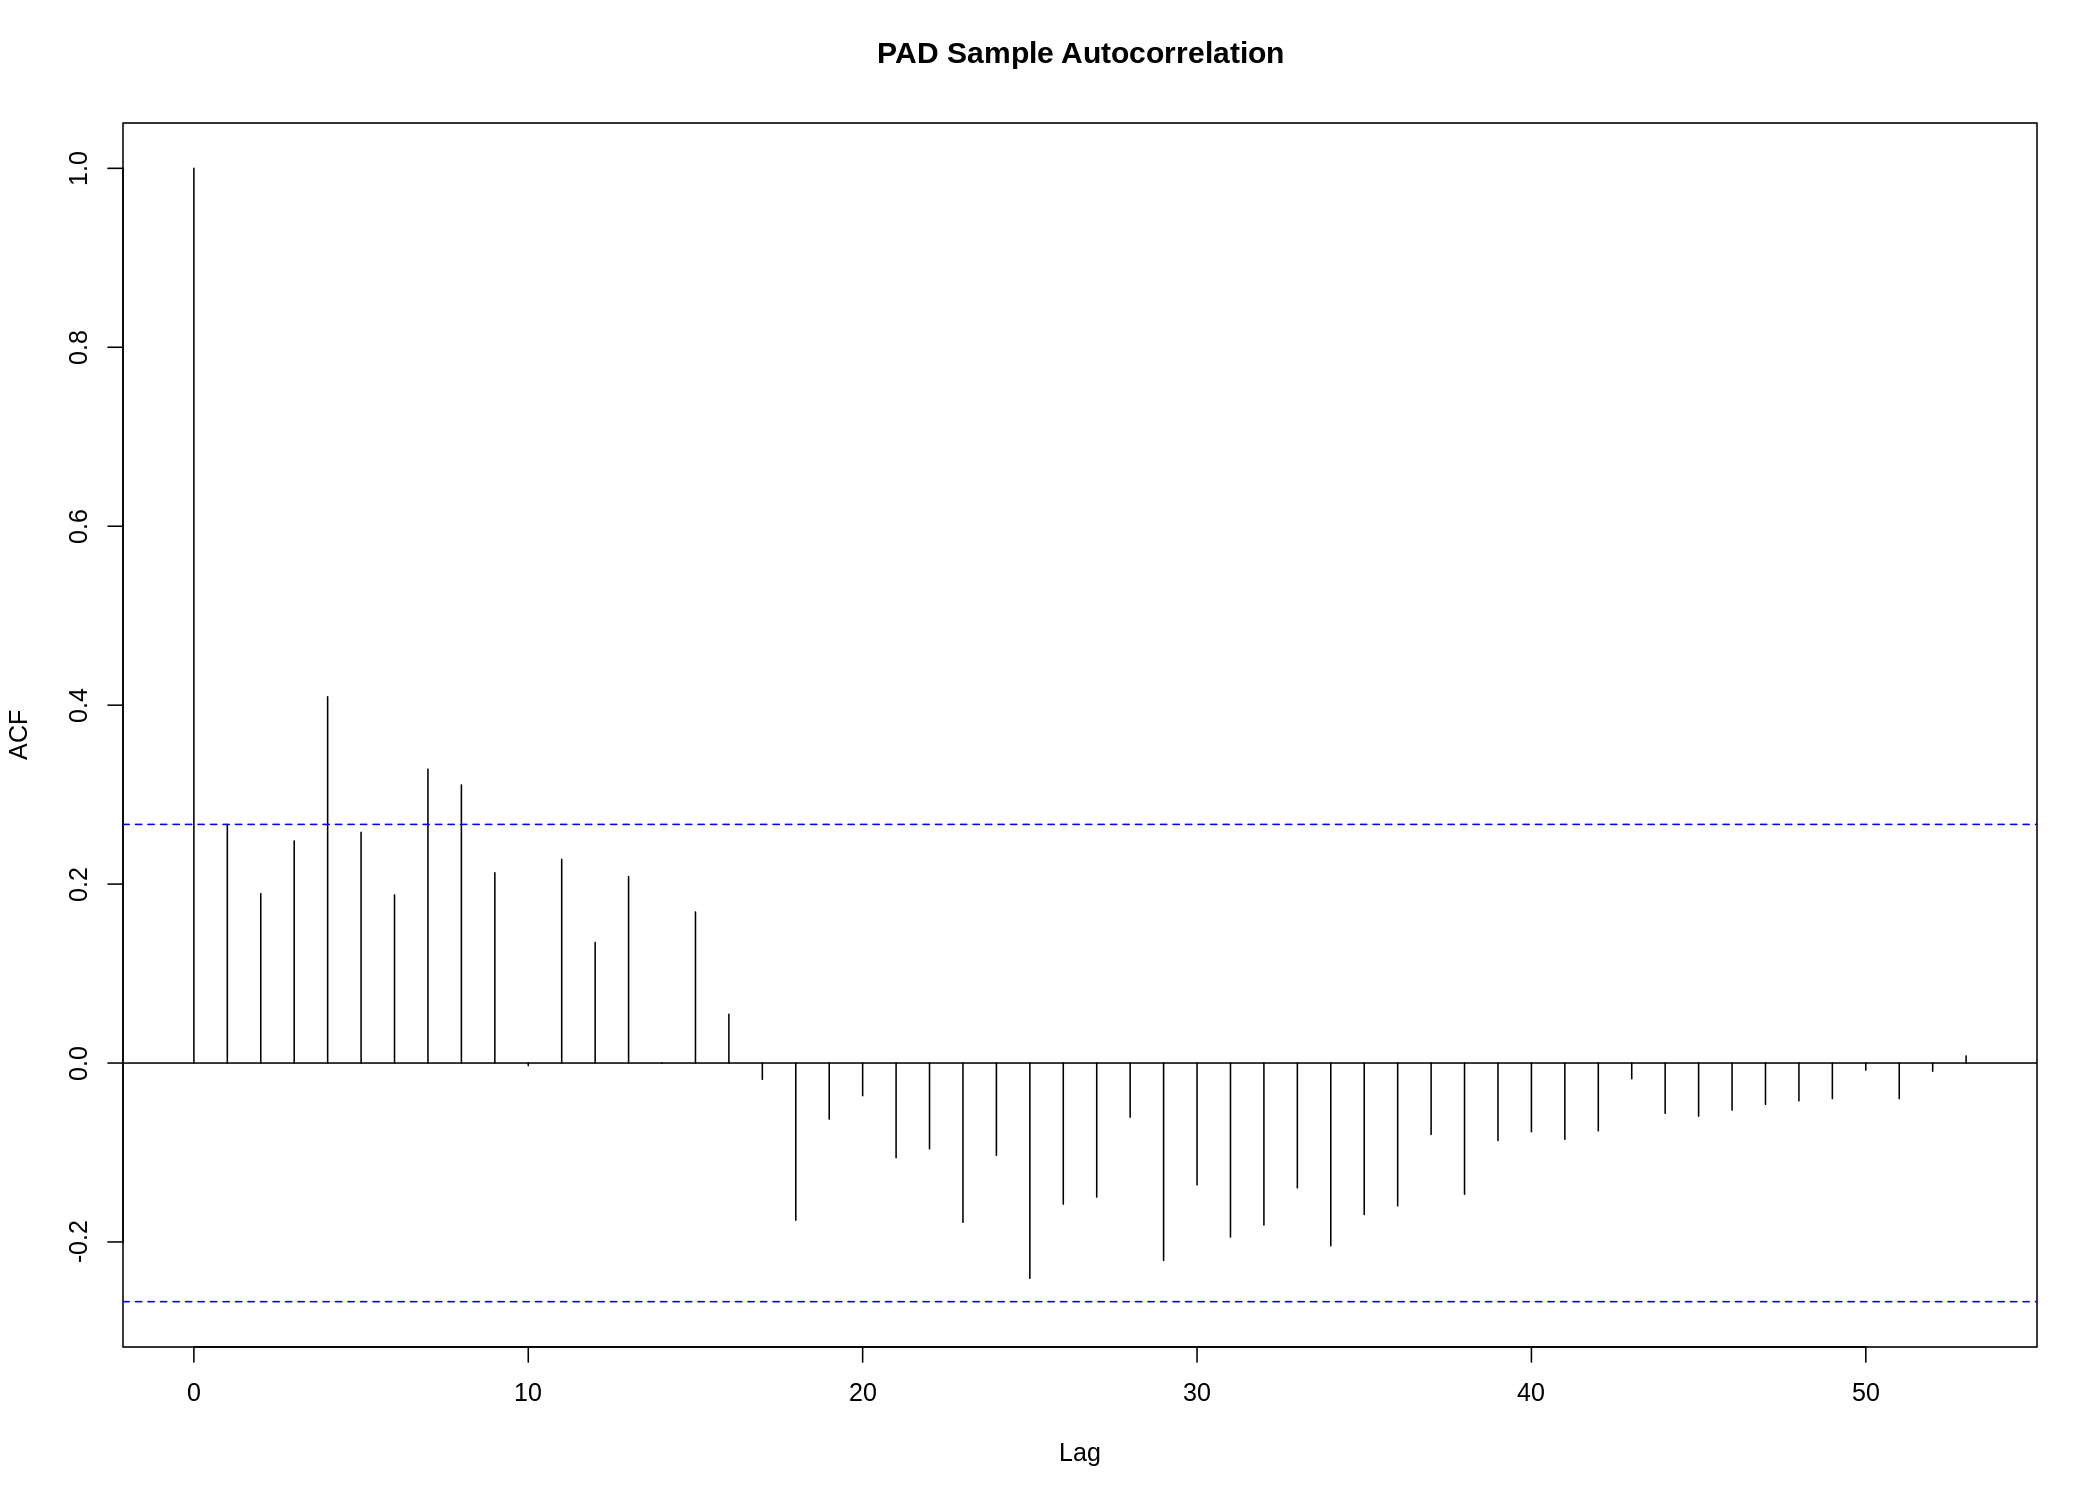

In [15]:
acf(pad.ts, type = "correlation", main="PAD Sample Autocorrelation", lag = 100)

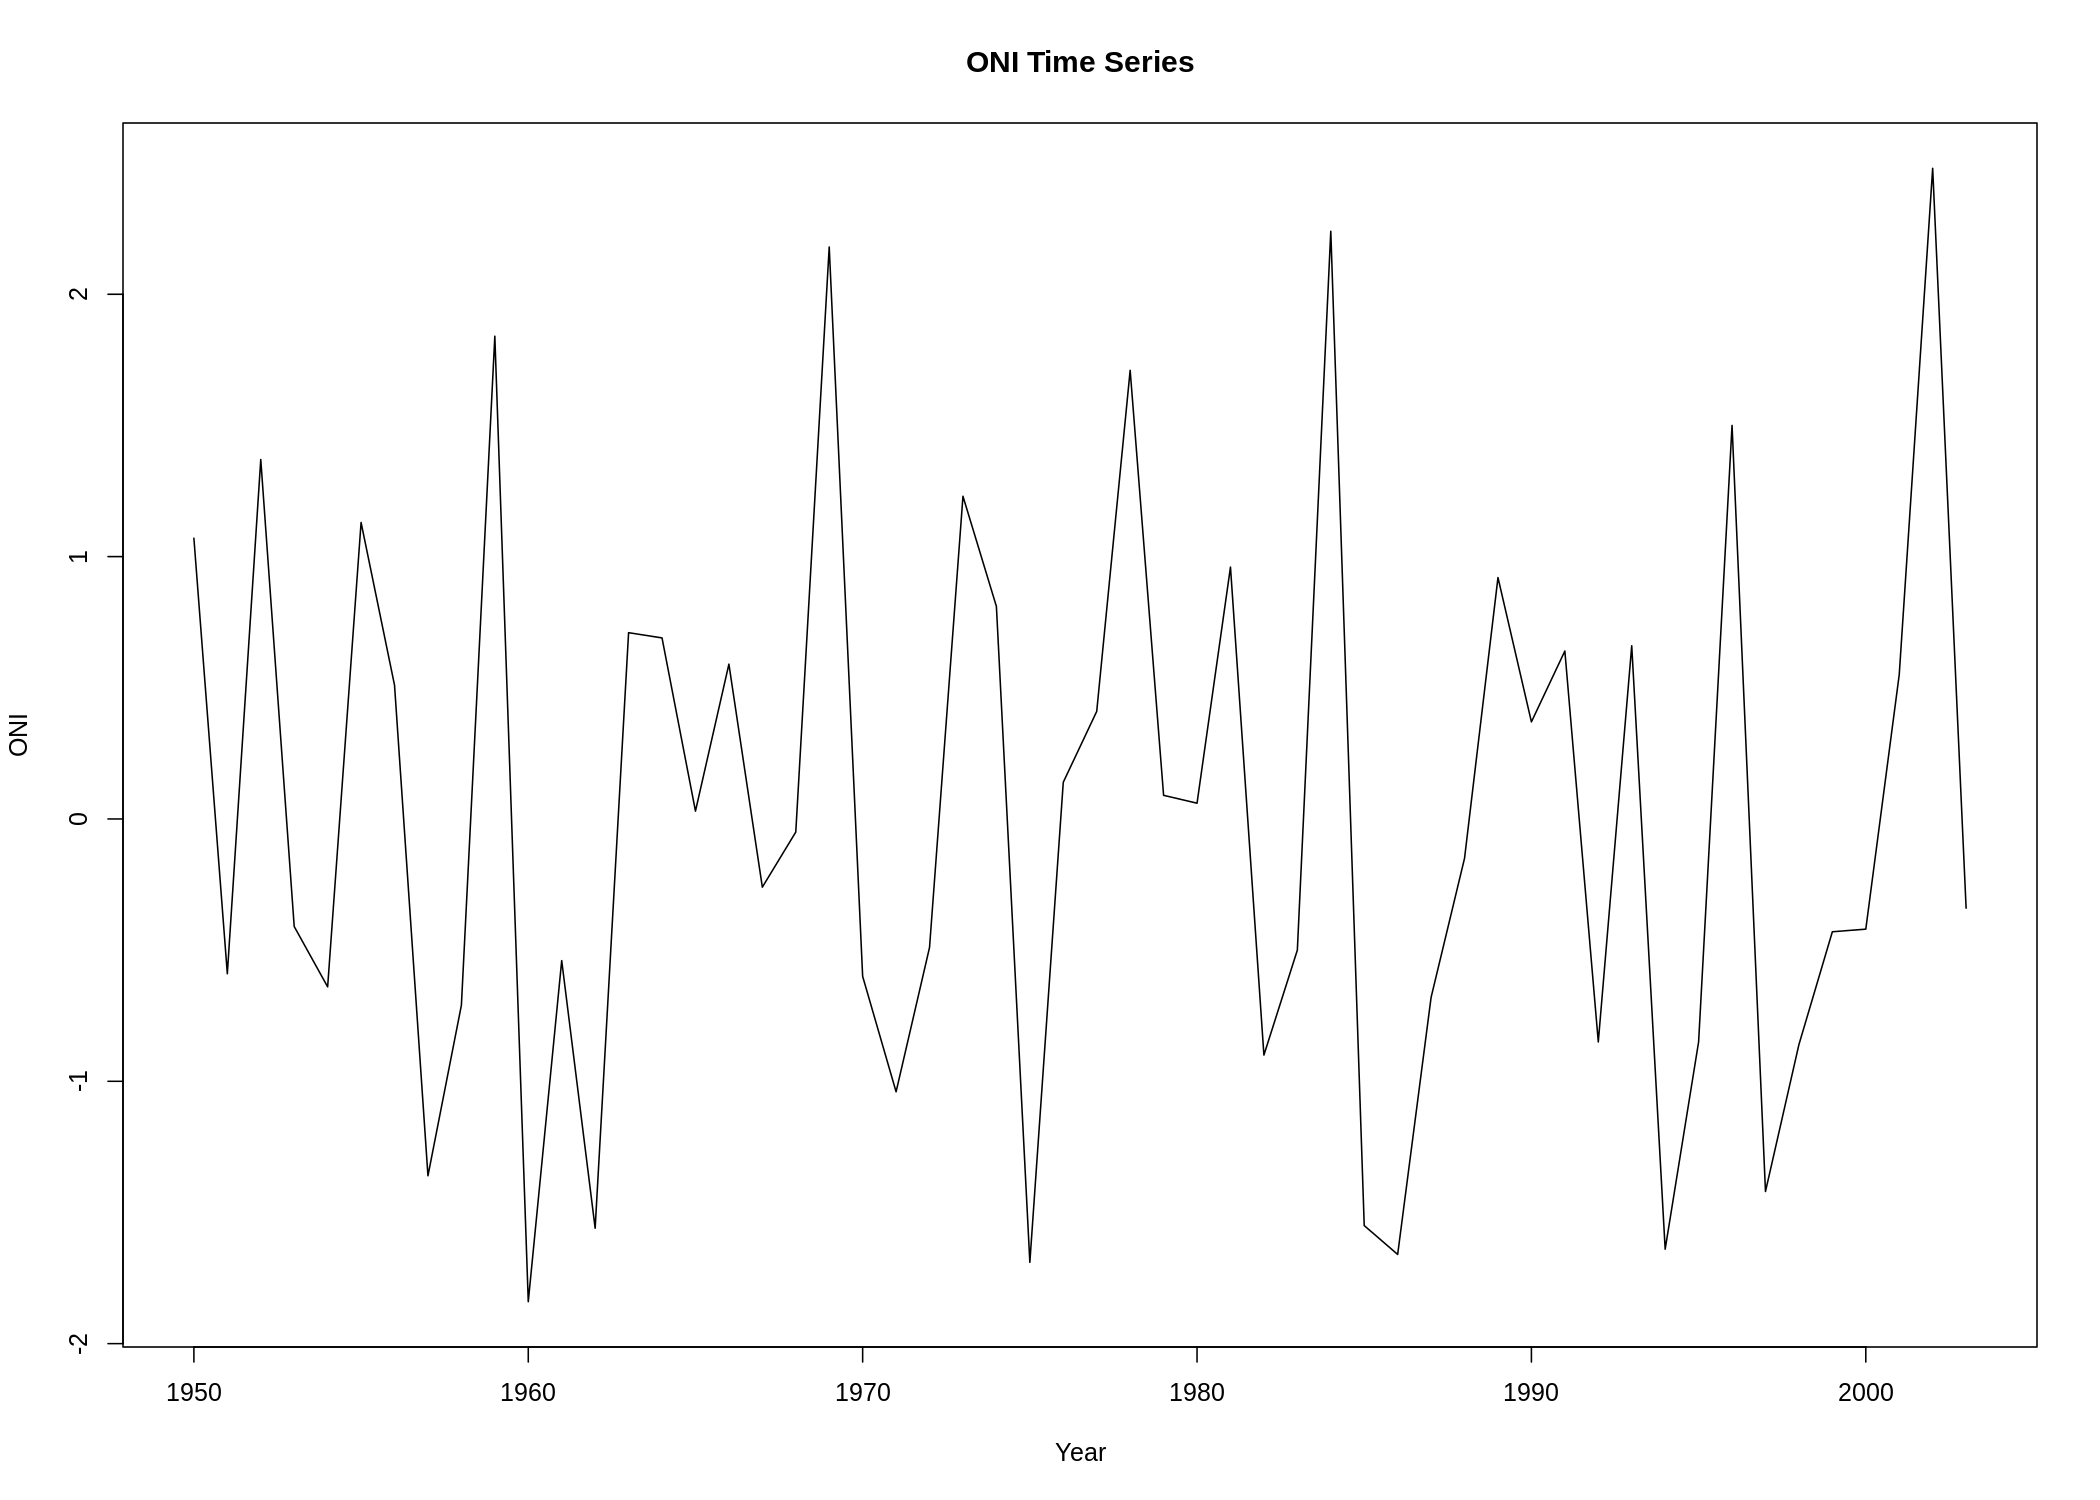

In [16]:
plot(oni.ts, xlab = "Year", ylab = "ONI", main = "ONI Time Series")

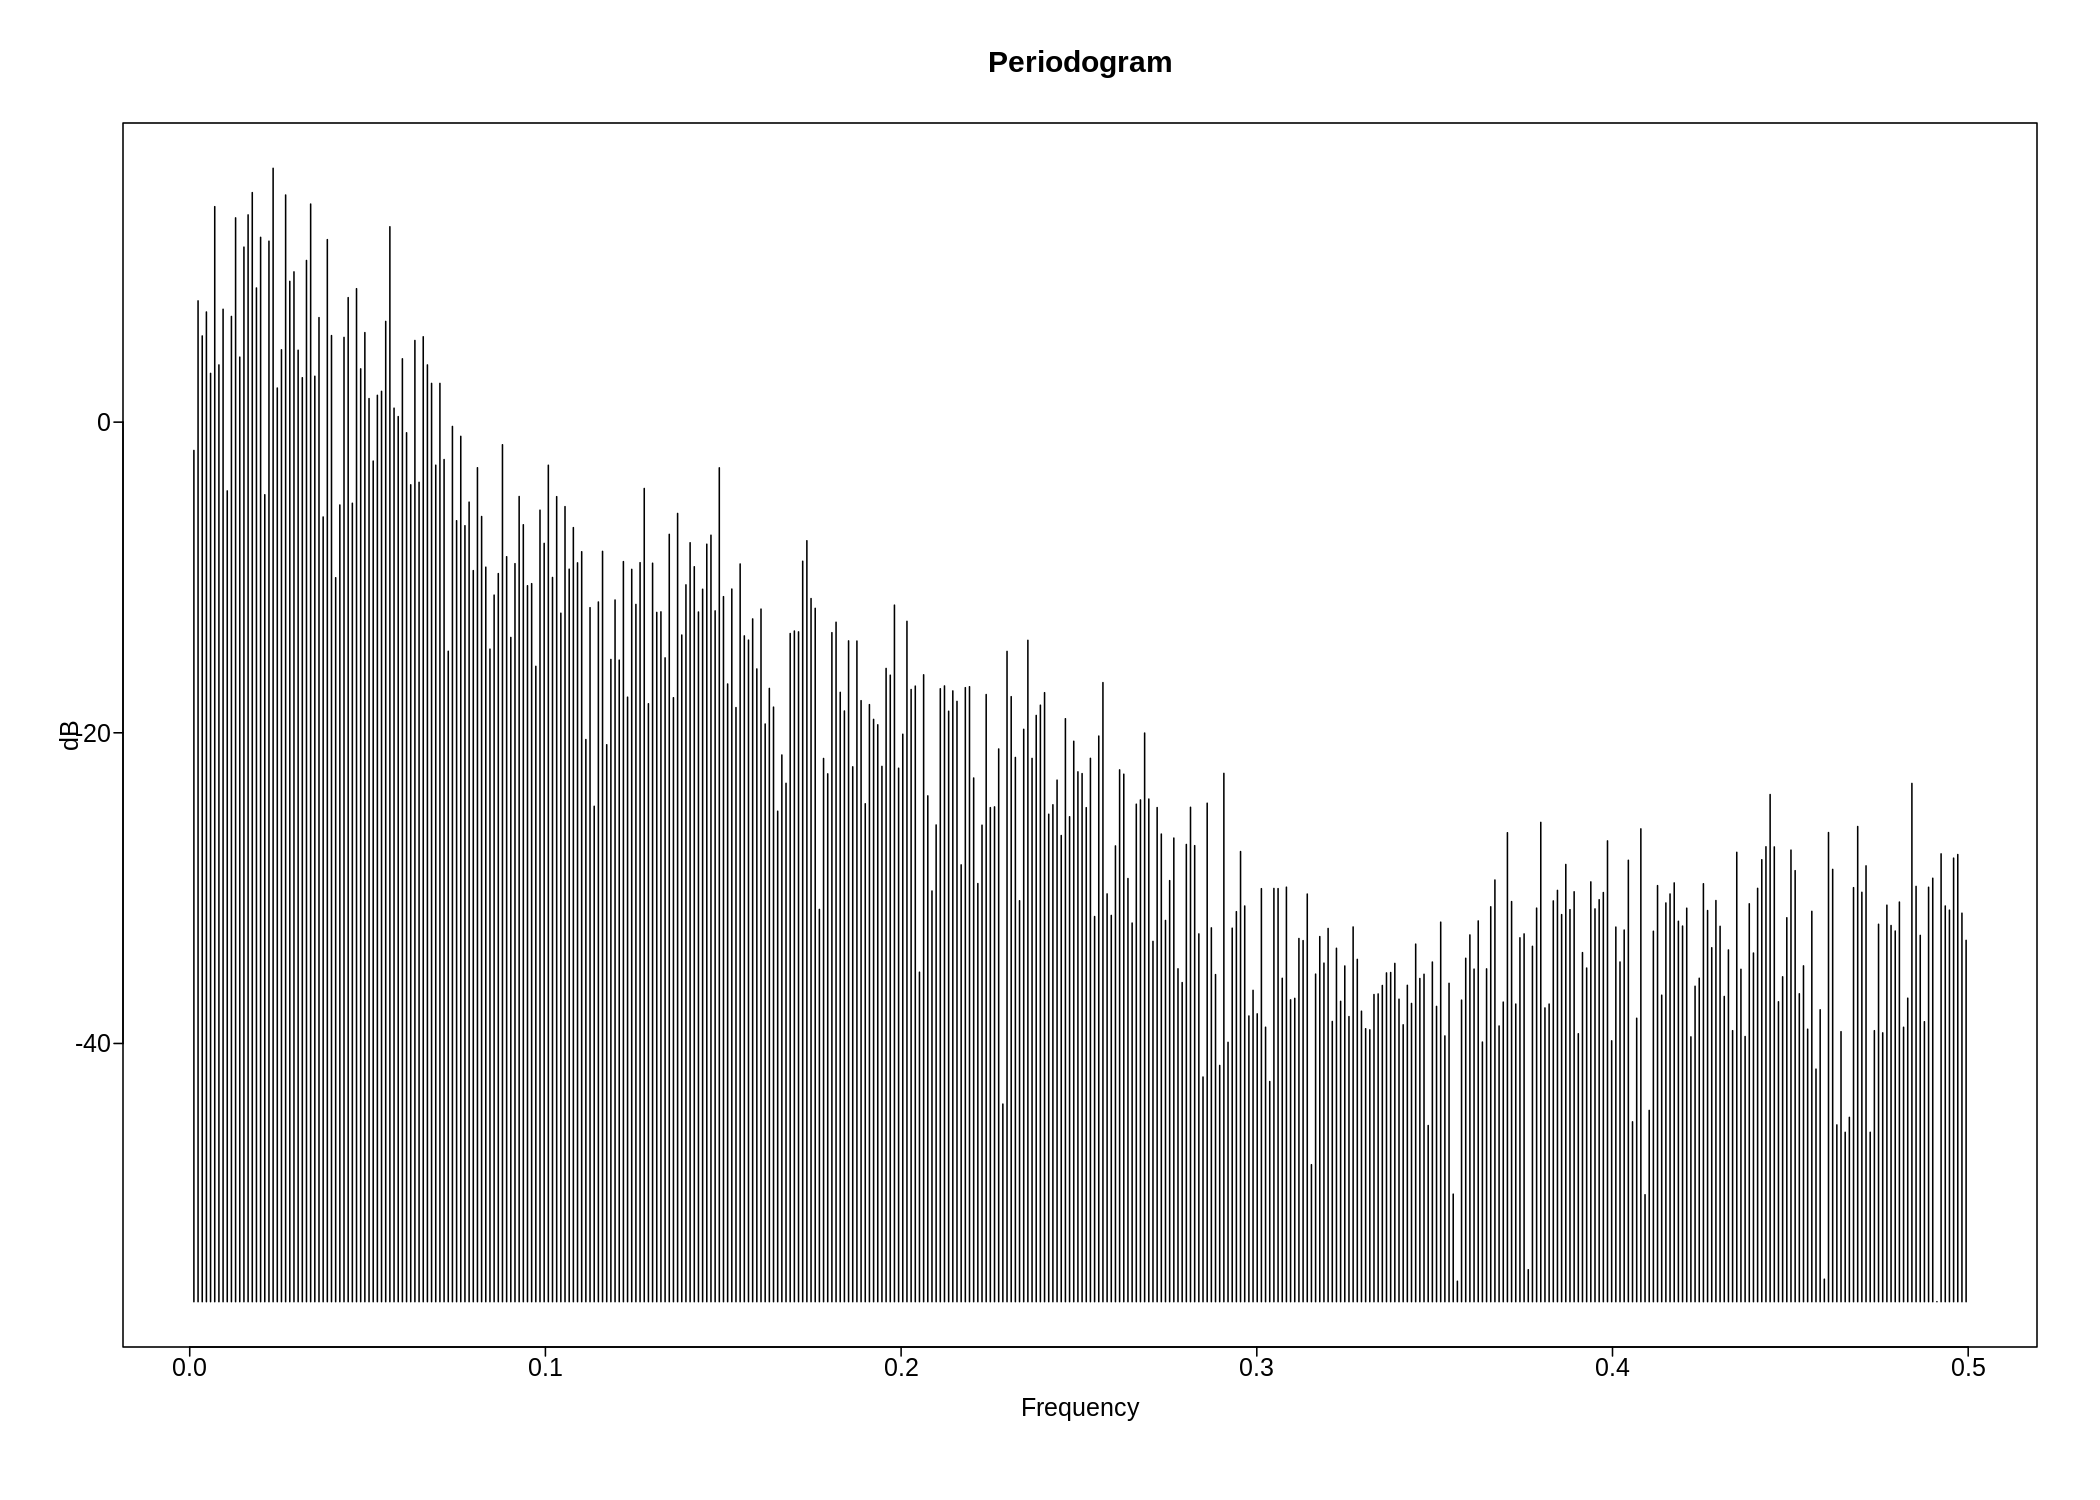

In [17]:
# periodogram for ONI
periodogram <- period.wge(oni.df$ANOM, plot=TRUE)

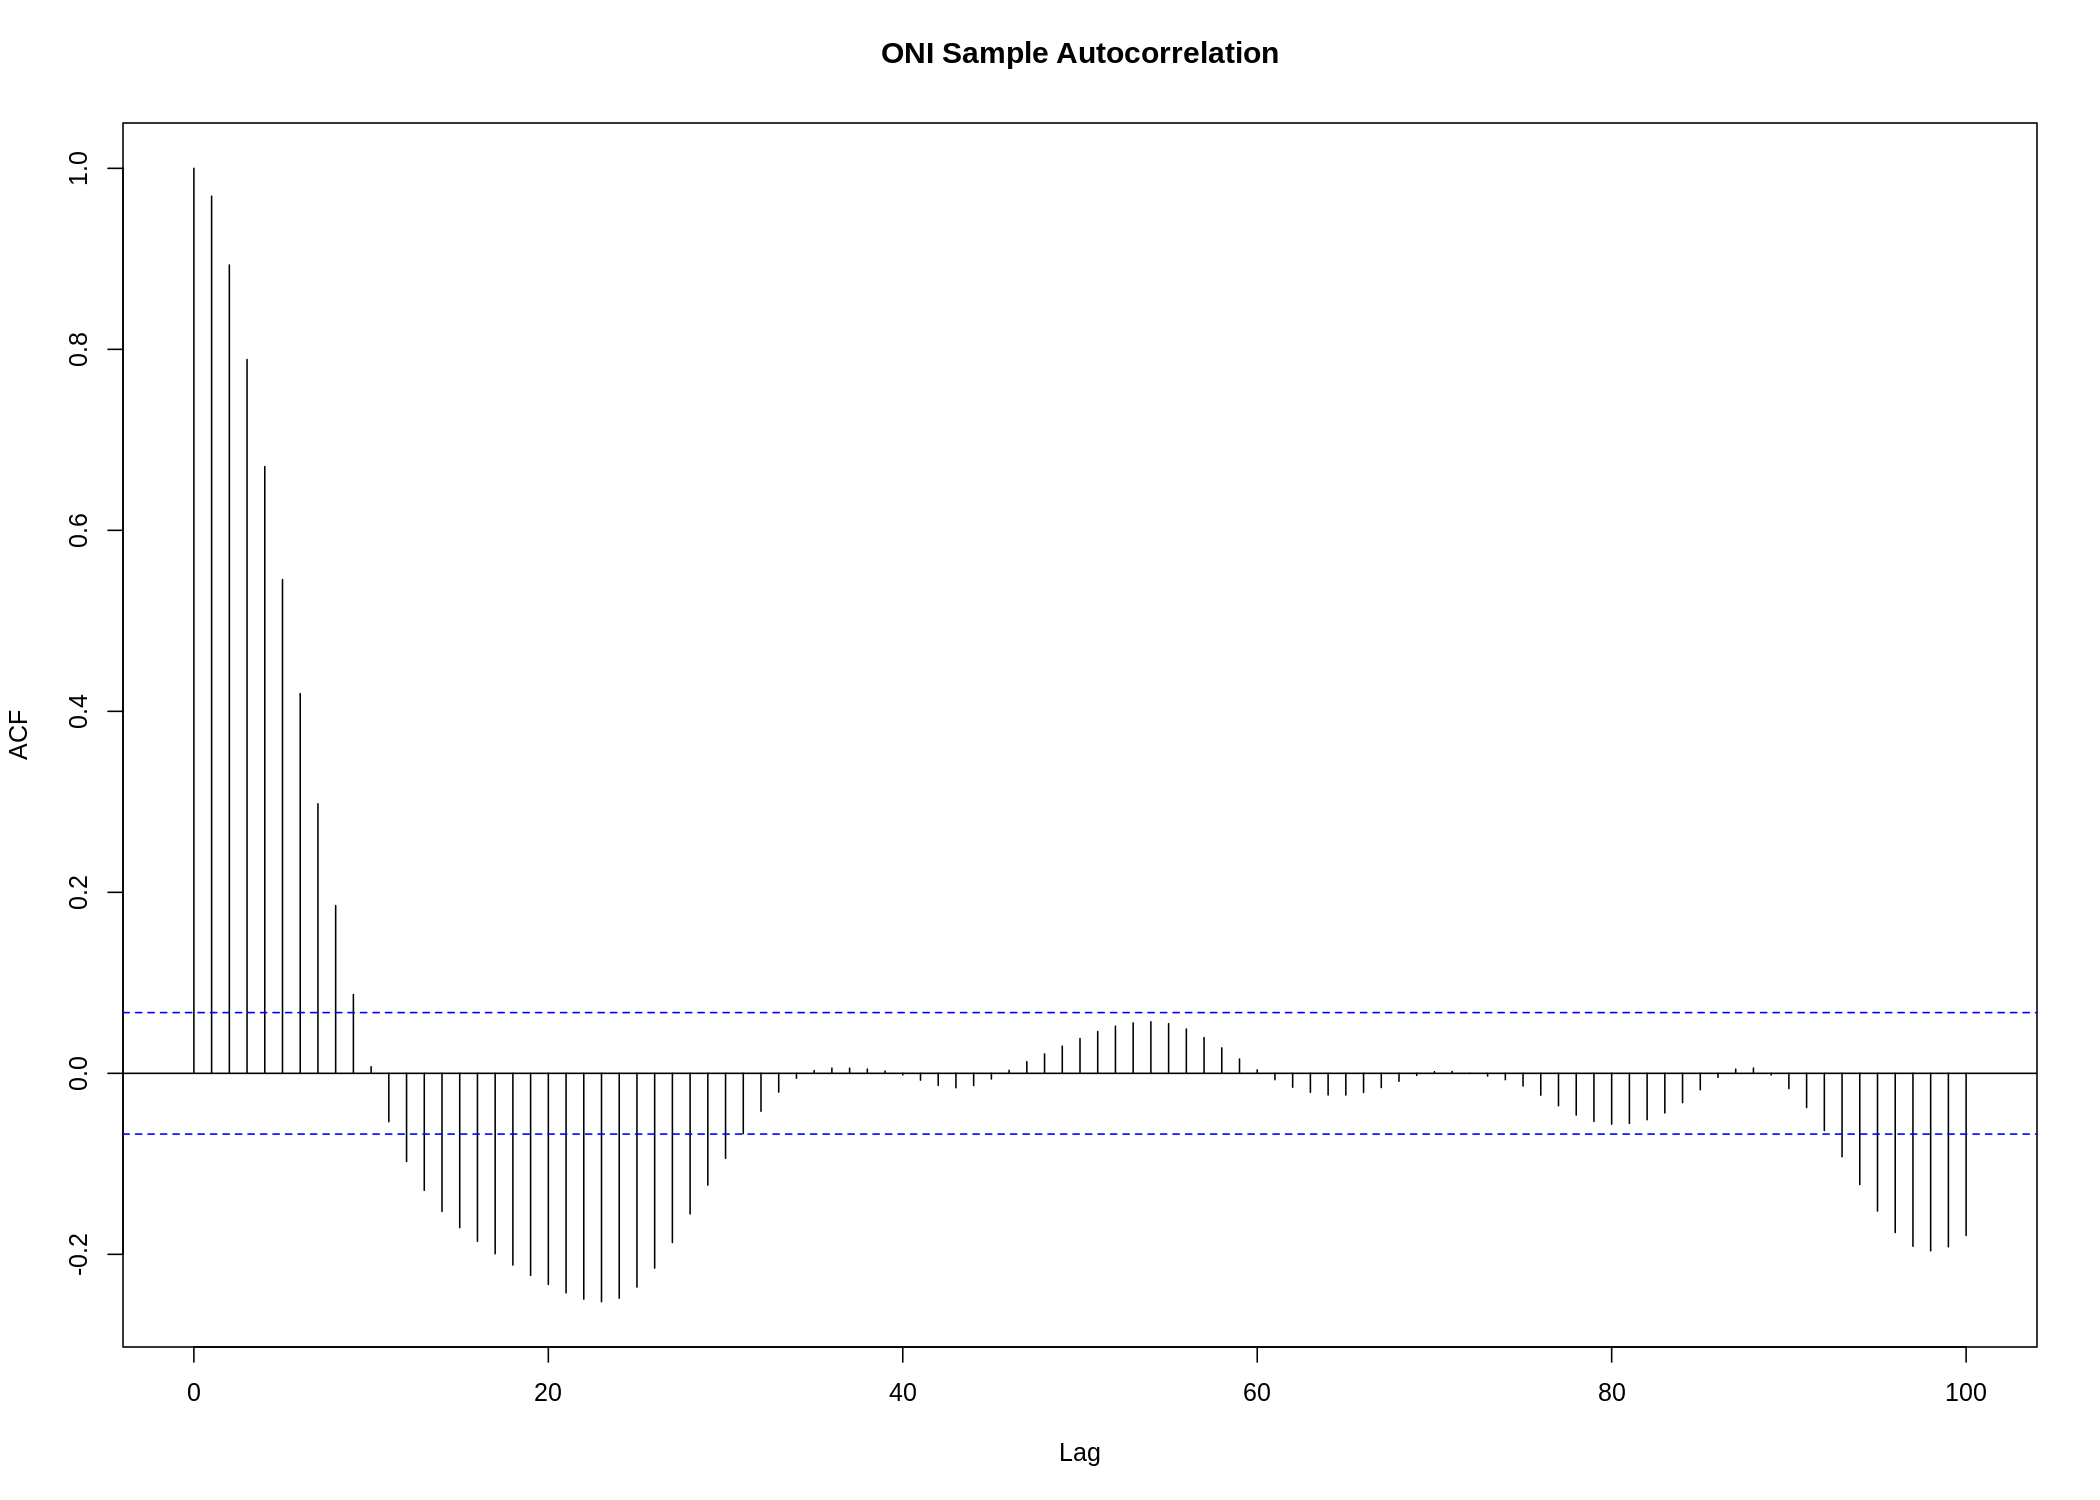

In [18]:
# autocorrelation for ONI
acf(oni.df$ANOM, type = "correlation", main="ONI Sample Autocorrelation", lag = 100)

$freq
  [1] 0.001172333 0.002344666 0.003516999 0.004689332 0.005861665 0.007033998
  [7] 0.008206331 0.009378664 0.010550996 0.011723329 0.012895662 0.014067995
 [13] 0.015240328 0.016412661 0.017584994 0.018757327 0.019929660 0.021101993
 [19] 0.022274326 0.023446659 0.024618992 0.025791325 0.026963658 0.028135991
 [25] 0.029308324 0.030480657 0.031652989 0.032825322 0.033997655 0.035169988
 [31] 0.036342321 0.037514654 0.038686987 0.039859320 0.041031653 0.042203986
 [37] 0.043376319 0.044548652 0.045720985 0.046893318 0.048065651 0.049237984
 [43] 0.050410317 0.051582649 0.052754982 0.053927315 0.055099648 0.056271981
 [49] 0.057444314 0.058616647 0.059788980 0.060961313 0.062133646 0.063305979
 [55] 0.064478312 0.065650645 0.066822978 0.067995311 0.069167644 0.070339977
 [61] 0.071512309 0.072684642 0.073856975 0.075029308 0.076201641 0.077373974
 [67] 0.078546307 0.079718640 0.080890973 0.082063306 0.083235639 0.084407972
 [73] 0.085580305 0.086752638 0.087924971 0.089097304 0.090269637 0.091441970
 [79] 0.092614302 0.093786635 0.094958968 0.096131301 0.097303634 0.098475967
 [85] 0.099648300 0.100820633 0.101992966 0.103165299 0.104337632 0.105509965
 [91] 0.106682298 0.107854631 0.109026964 0.110199297 0.111371630 0.112543962
 [97] 0.113716295 0.114888628 0.116060961 0.117233294 0.118405627 0.119577960
[103] 0.120750293 0.121922626 0.123094959 0.124267292 0.125439625 0.126611958
[109] 0.127784291 0.128956624 0.130128957 0.131301290 0.132473623 0.133645955
[115] 0.134818288 0.135990621 0.137162954 0.138335287 0.139507620 0.140679953
[121] 0.141852286 0.143024619 0.144196952 0.145369285 0.146541618 0.147713951
[127] 0.148886284 0.150058617 0.151230950 0.152403283 0.153575615 0.154747948
[133] 0.155920281 0.157092614 0.158264947 0.159437280 0.160609613 0.161781946
[139] 0.162954279 0.164126612 0.165298945 0.166471278 0.167643611 0.168815944
[145] 0.169988277 0.171160610 0.172332943 0.173505275 0.174677608 0.175849941
[151] 0.177022274 0.178194607 0.179366940 0.180539273 0.181711606 0.182883939
[157] 0.184056272 0.185228605 0.186400938 0.187573271 0.188745604 0.189917937
[163] 0.191090270 0.192262603 0.193434936 0.194607268 0.195779601 0.196951934
[169] 0.198124267 0.199296600 0.200468933 0.201641266 0.202813599 0.203985932
[175] 0.205158265 0.206330598 0.207502931 0.208675264 0.209847597 0.211019930
[181] 0.212192263 0.213364596 0.214536928 0.215709261 0.216881594 0.218053927
[187] 0.219226260 0.220398593 0.221570926 0.222743259 0.223915592 0.225087925
[193] 0.226260258 0.227432591 0.228604924 0.229777257 0.230949590 0.232121923
[199] 0.233294256 0.234466589 0.235638921 0.236811254 0.237983587 0.239155920
[205] 0.240328253 0.241500586 0.242672919 0.243845252 0.245017585 0.246189918
[211] 0.247362251 0.248534584 0.249706917 0.250879250 0.252051583 0.253223916
[217] 0.254396249 0.255568581 0.256740914 0.257913247 0.259085580 0.260257913
[223] 0.261430246 0.262602579 0.263774912 0.264947245 0.266119578 0.267291911
[229] 0.268464244 0.269636577 0.270808910 0.271981243 0.273153576 0.274325909
[235] 0.275498242 0.276670574 0.277842907 0.279015240 0.280187573 0.281359906
[241] 0.282532239 0.283704572 0.284876905 0.286049238 0.287221571 0.288393904
[247] 0.289566237 0.290738570 0.291910903 0.293083236 0.294255569 0.295427902
[253] 0.296600234 0.297772567 0.298944900 0.300117233 0.301289566 0.302461899
[259] 0.303634232 0.304806565 0.305978898 0.307151231 0.308323564 0.309495897
[265] 0.310668230 0.311840563 0.313012896 0.314185229 0.315357562 0.316529894
[271] 0.317702227 0.318874560 0.320046893 0.321219226 0.322391559 0.323563892
[277] 0.324736225 0.325908558 0.327080891 0.328253224 0.329425557 0.330597890
[283] 0.331770223 0.332942556 0.334114889 0.335287222 0.336459555 0.337631887
[289] 0.338804220 0.339976553 0.341148886 0.342321219 0.343493552 0.344665885
[295] 0.345838218 0.347010551 0.348182884 0.349355217 0.350527550 0.351699883
[301] 0.352872216 0.354044549 0.355216882 0.356389215 0.357561547 0.358733880
[307] 0.35990621

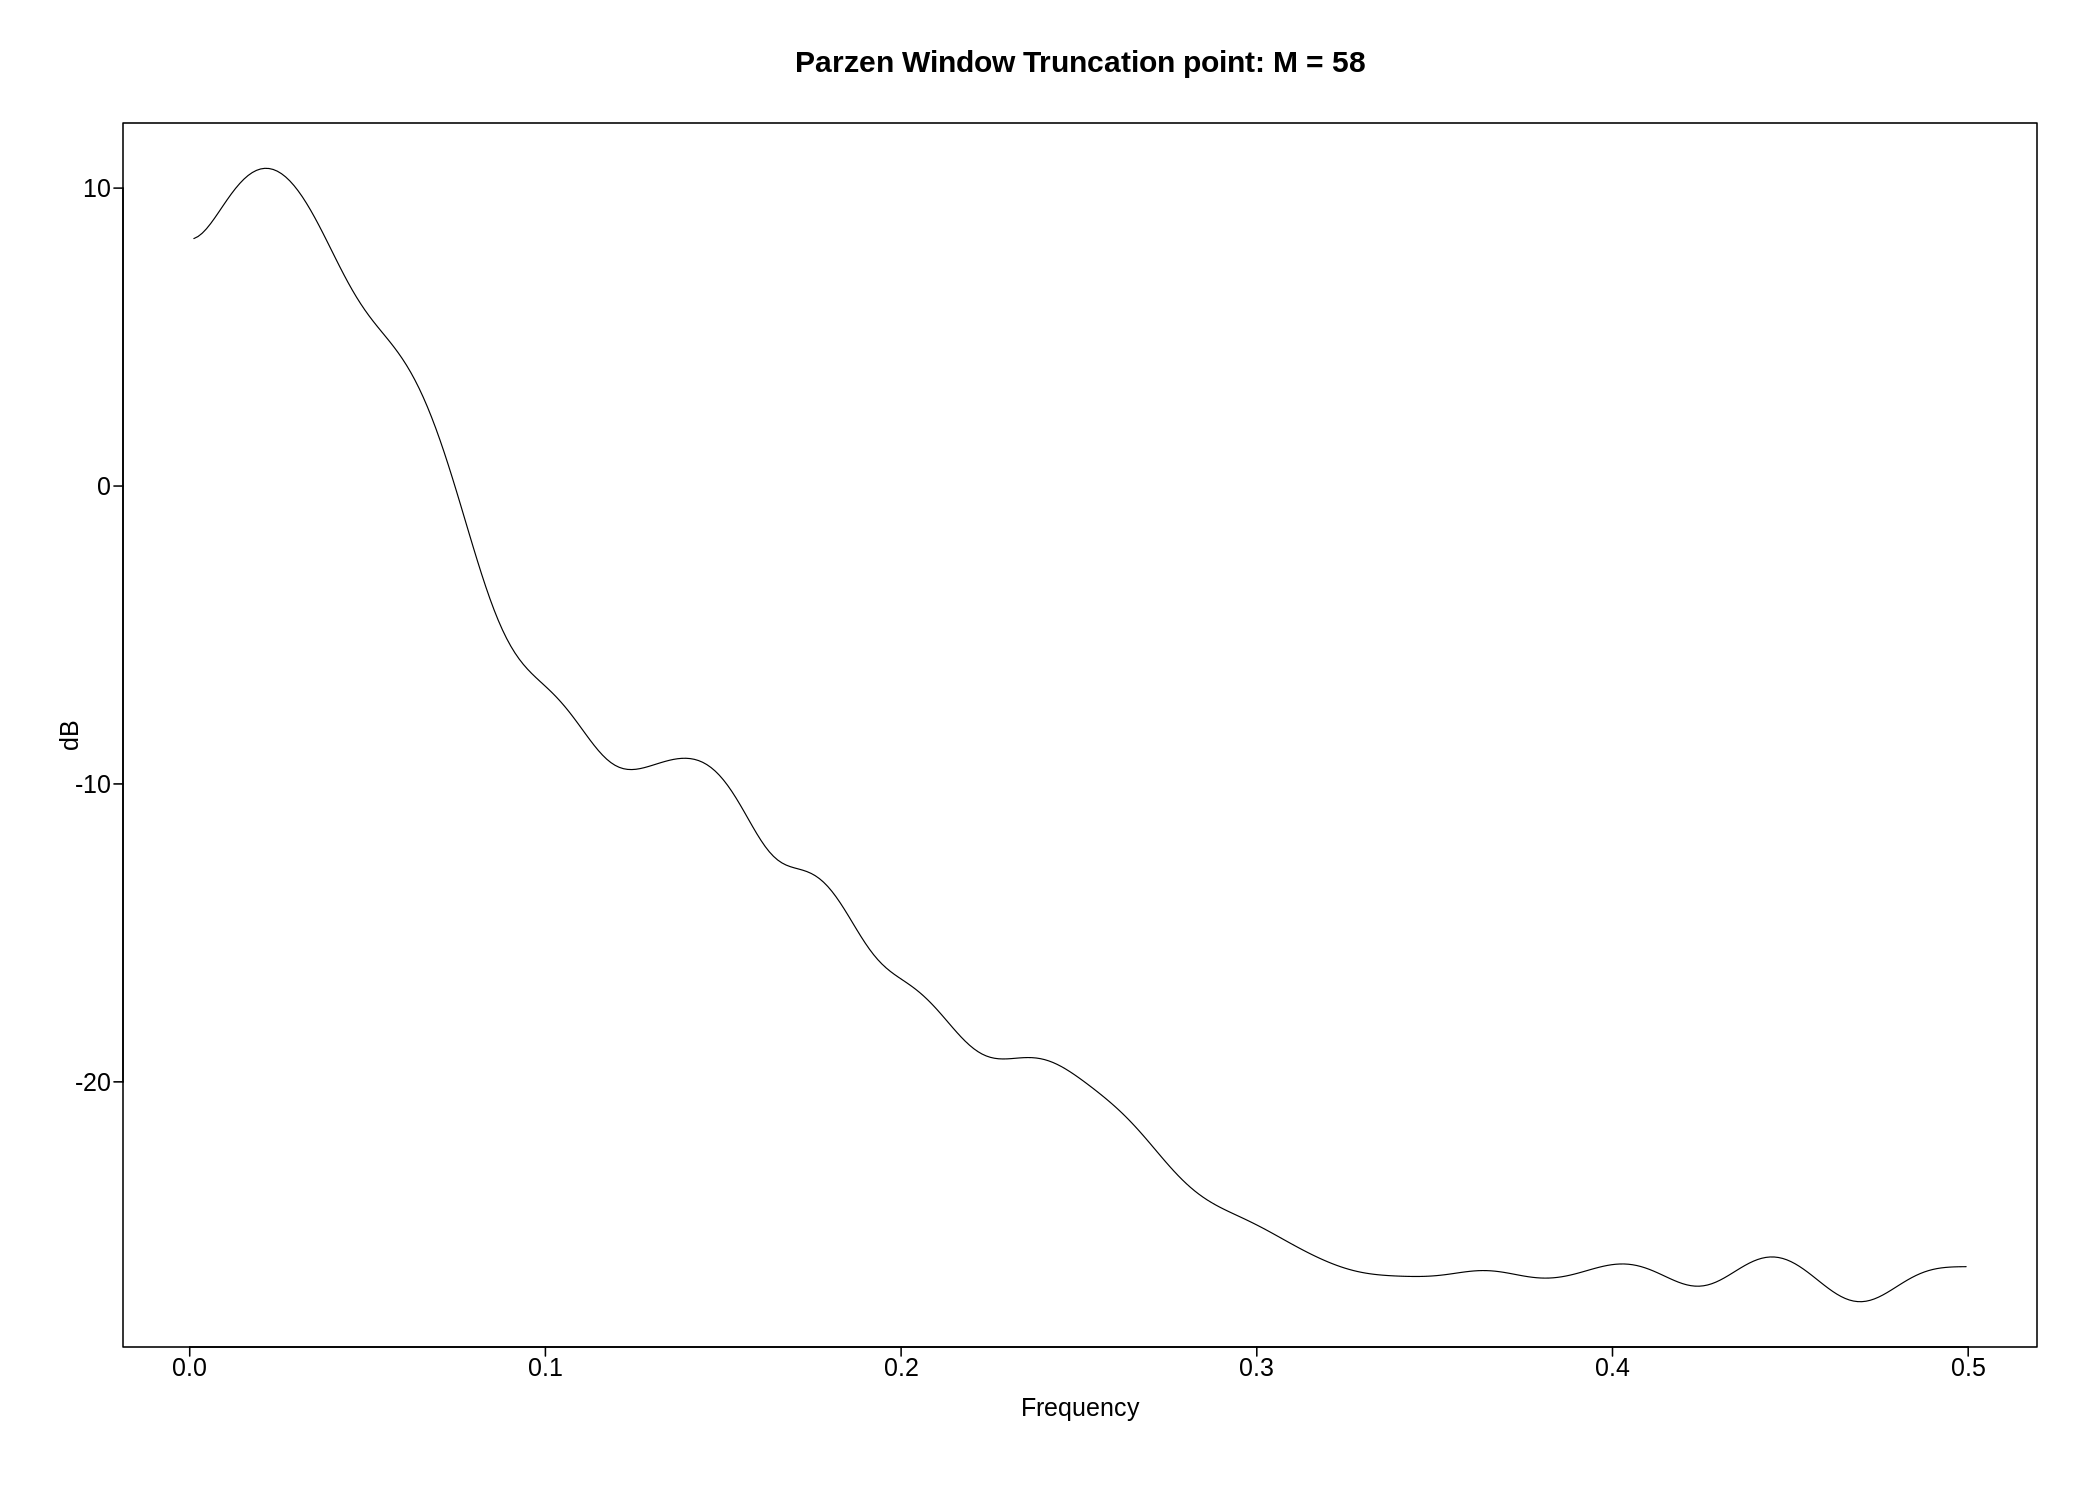

In [19]:
parzen.wge(oni.df$ANOM,trunc=0)

This ONI data has some minor peaks and has some lags in the ACF, but does not last very long. This suggests psuedo-periodic behavior.

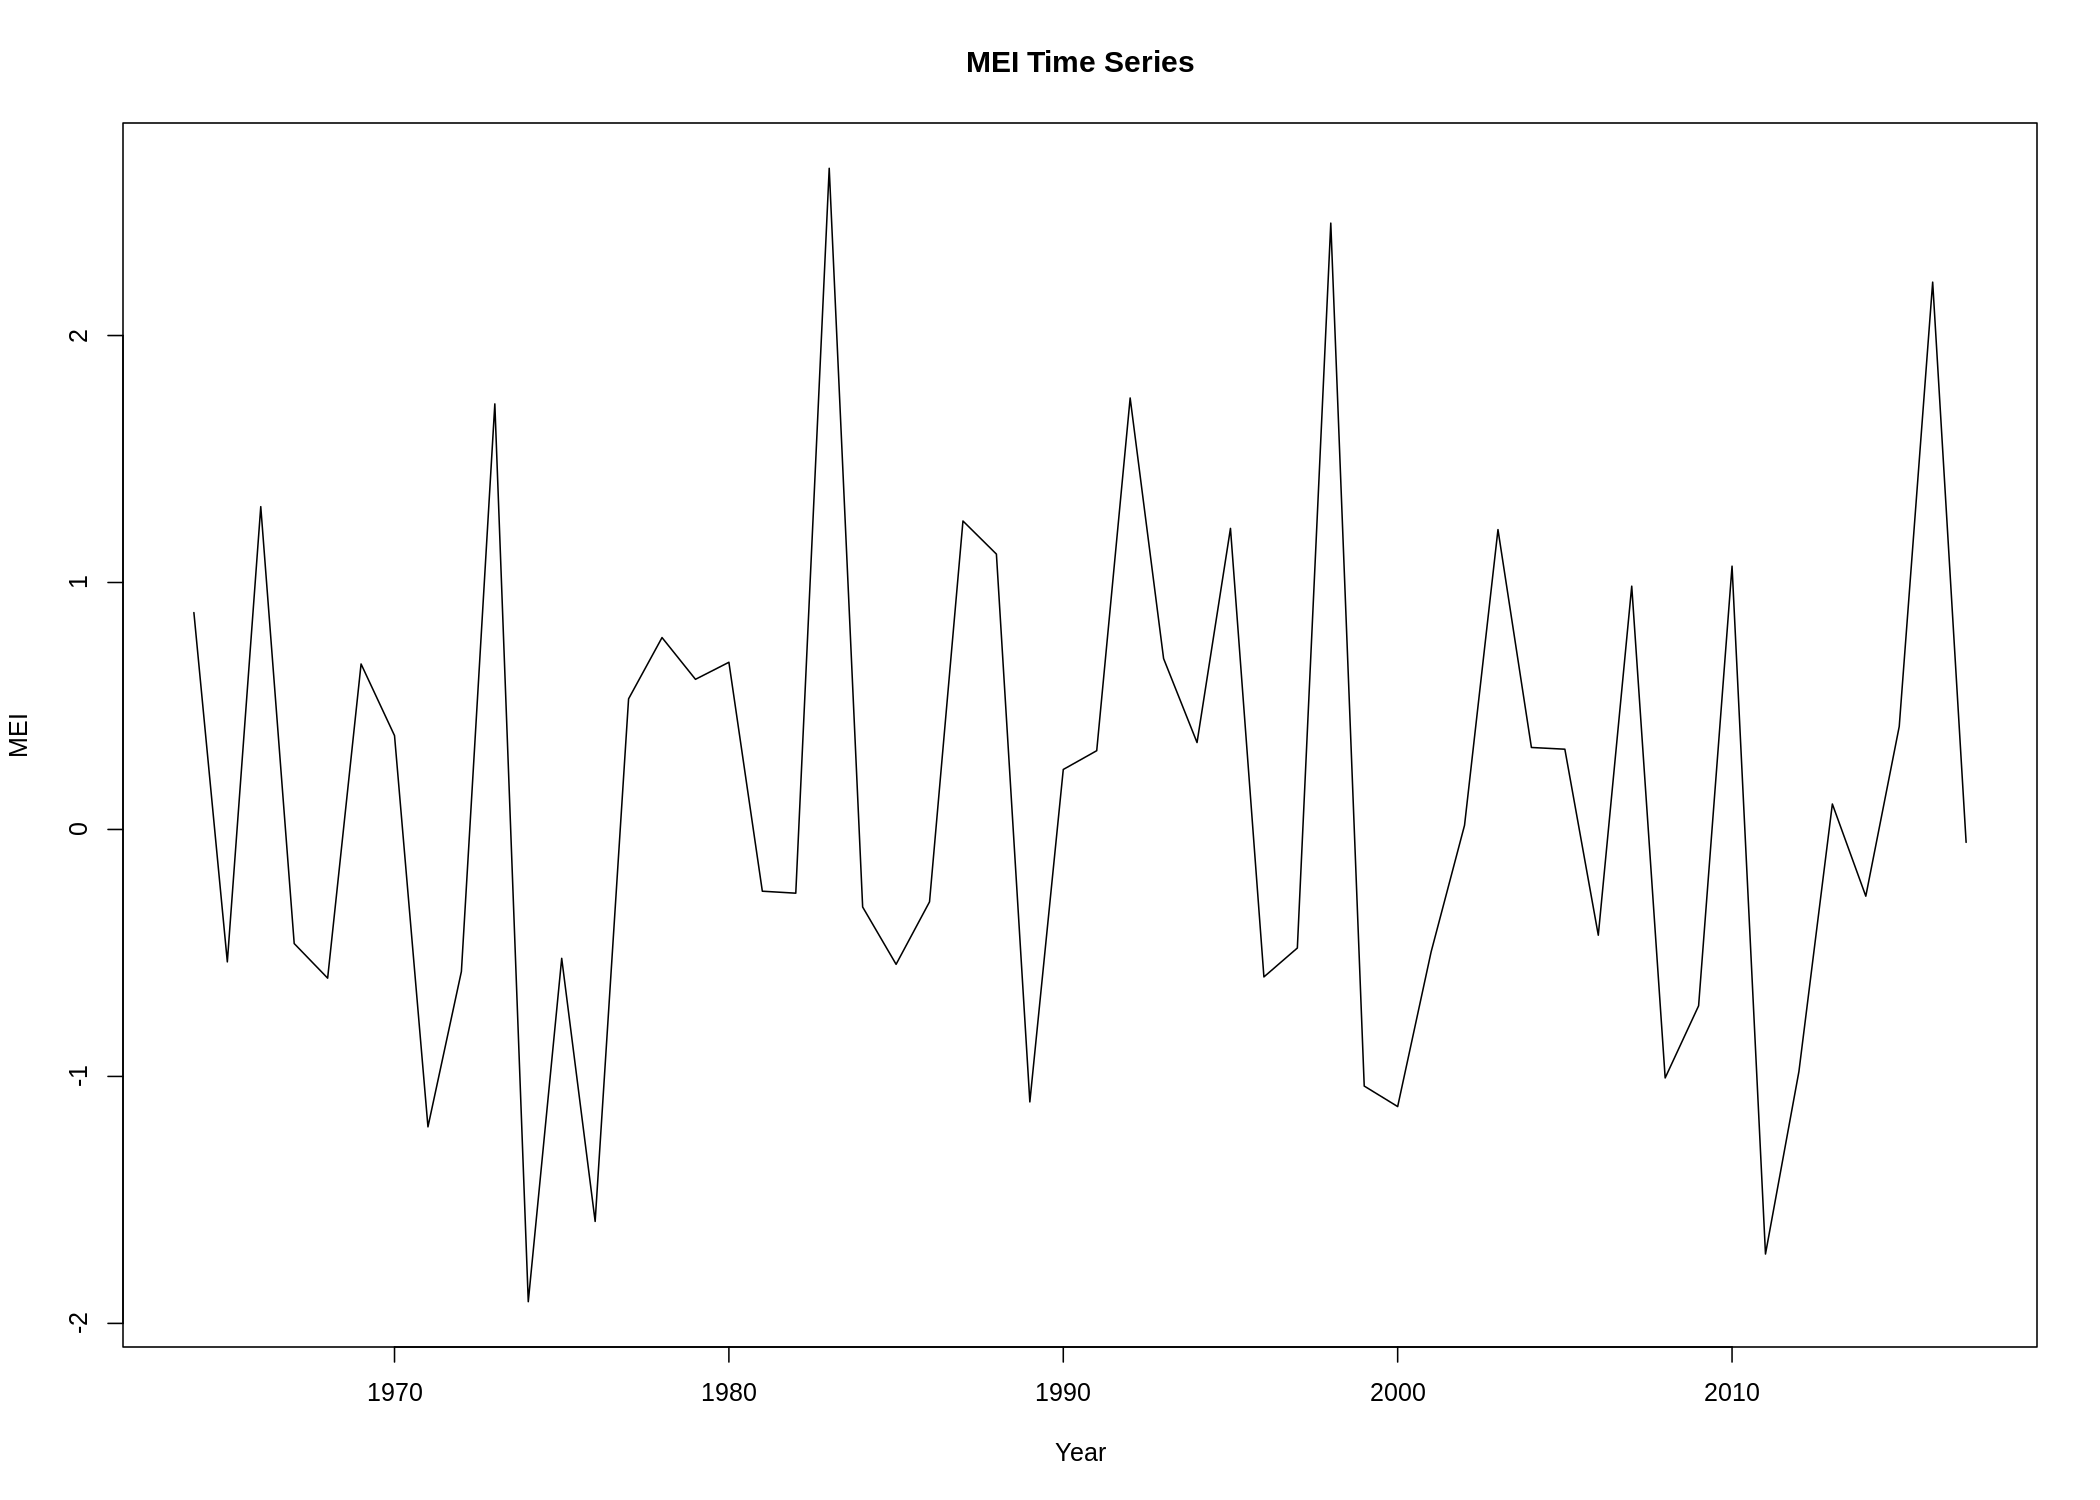

In [20]:
plot(mei.ts, xlab = "Year", ylab = "MEI", main = "MEI Time Series")

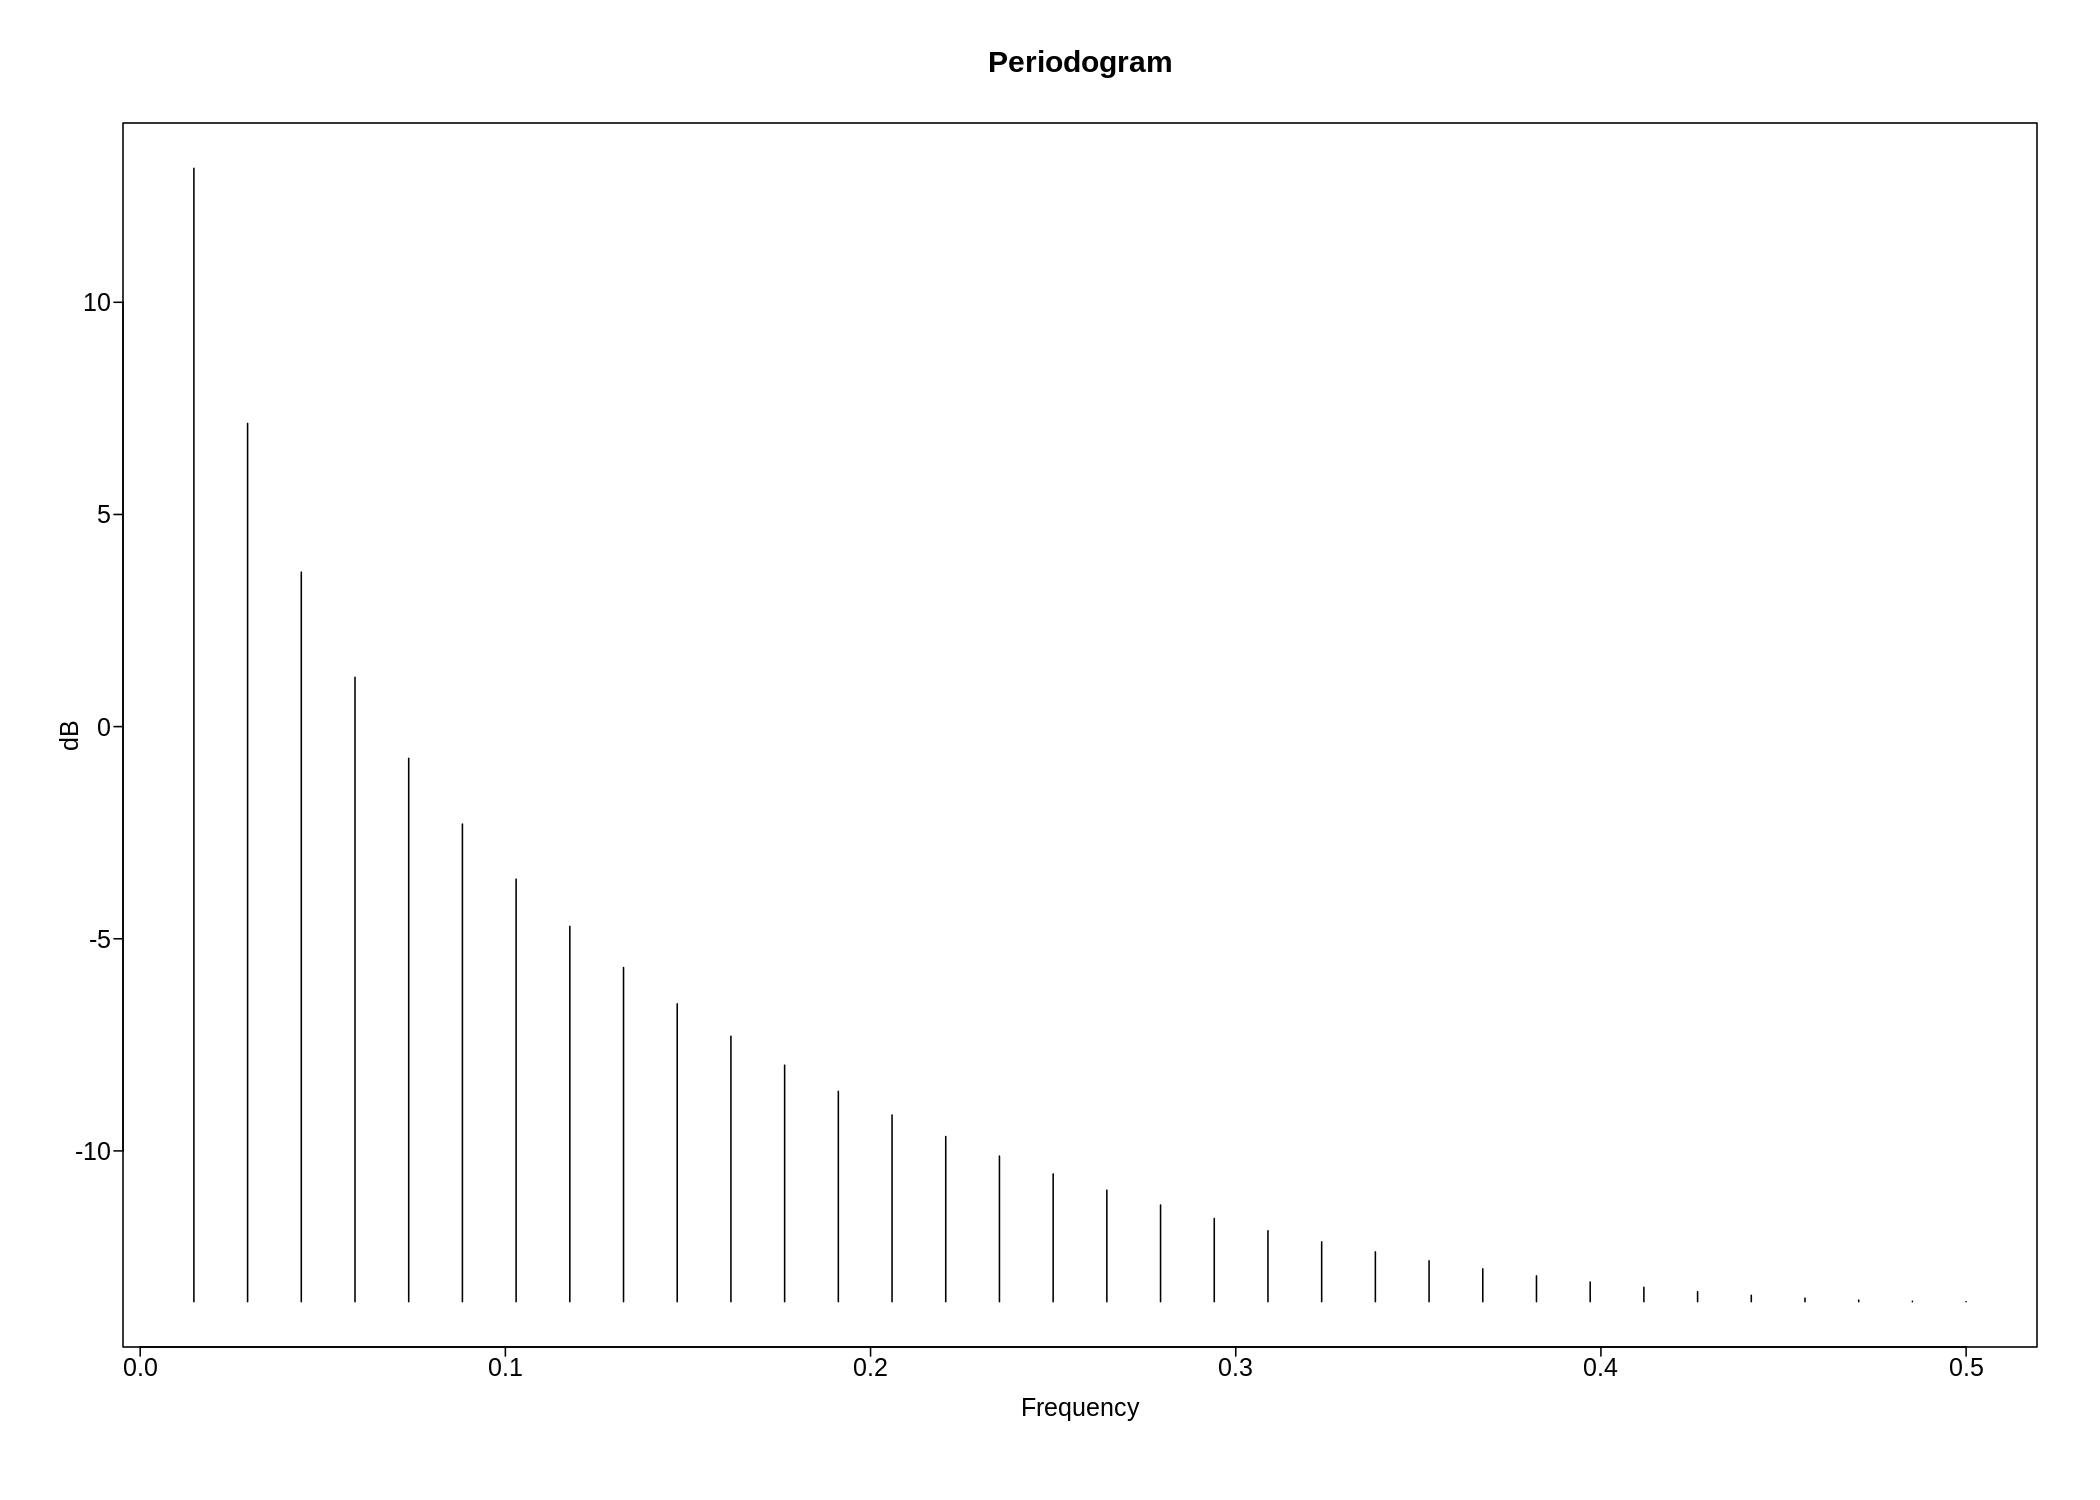

In [21]:
periodogram <- period.wge(mei.df$YEAR, plot=TRUE)

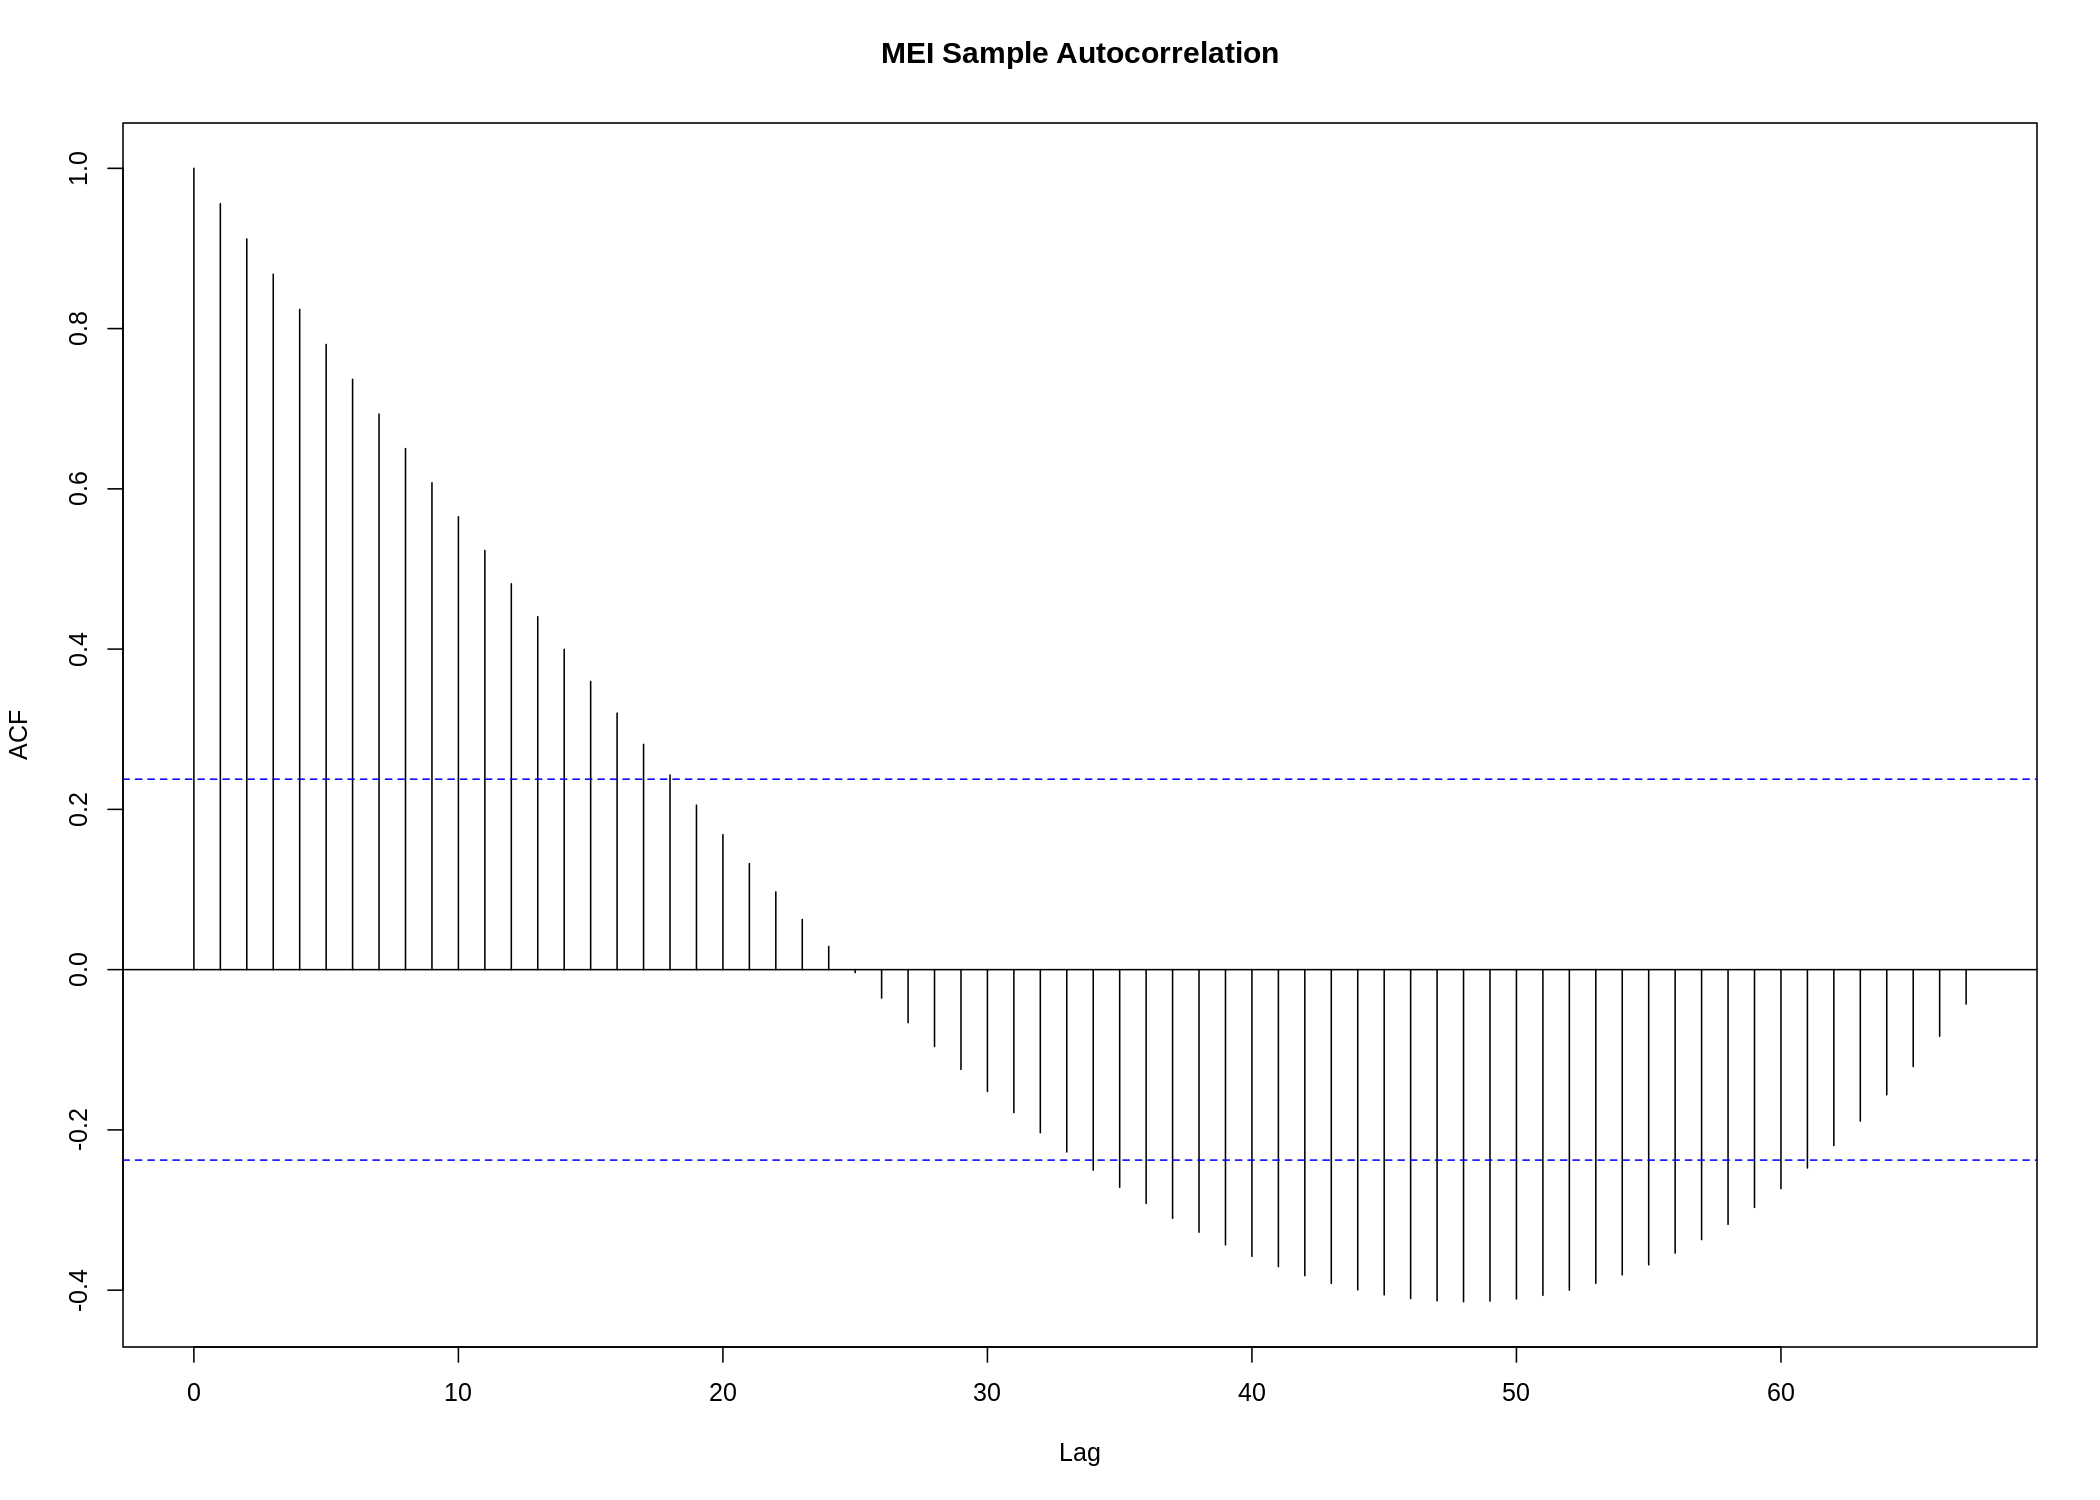

In [22]:
acf(mei.df$YEAR, type = "correlation", main="MEI Sample Autocorrelation", lag = 100)

$freq
 [1] 0.01470588 0.02941176 0.04411765 0.05882353 0.07352941 0.08823529
 [7] 0.10294118 0.11764706 0.13235294 0.14705882 0.16176471 0.17647059
[13] 0.19117647 0.20588235 0.22058824 0.23529412 0.25000000 0.26470588
[19] 0.27941176 0.29411765 0.30882353 0.32352941 0.33823529 0.35294118
[25] 0.36764706 0.38235294 0.39705882 0.41176471 0.42647059 0.44117647
[31] 0.45588235 0.47058824 0.48529412 0.50000000

$pzgram
 [1]   9.691433   8.706132   7.052264   4.733357   1.824481  -1.390144
 [7]  -4.296897  -6.362002  -7.710364  -8.622671  -9.214389  -9.709281
[13] -10.359674 -11.203709 -12.066122 -12.766578 -13.287162 -13.686704
[19] -13.985338 -14.214675 -14.458304 -14.772953 -15.125156 -15.438206
[25] -15.677402 -15.856447 -15.985868 -16.067676 -16.127864 -16.206581
[31] -16.312573 -16.413584 -16.476290 -16.495571

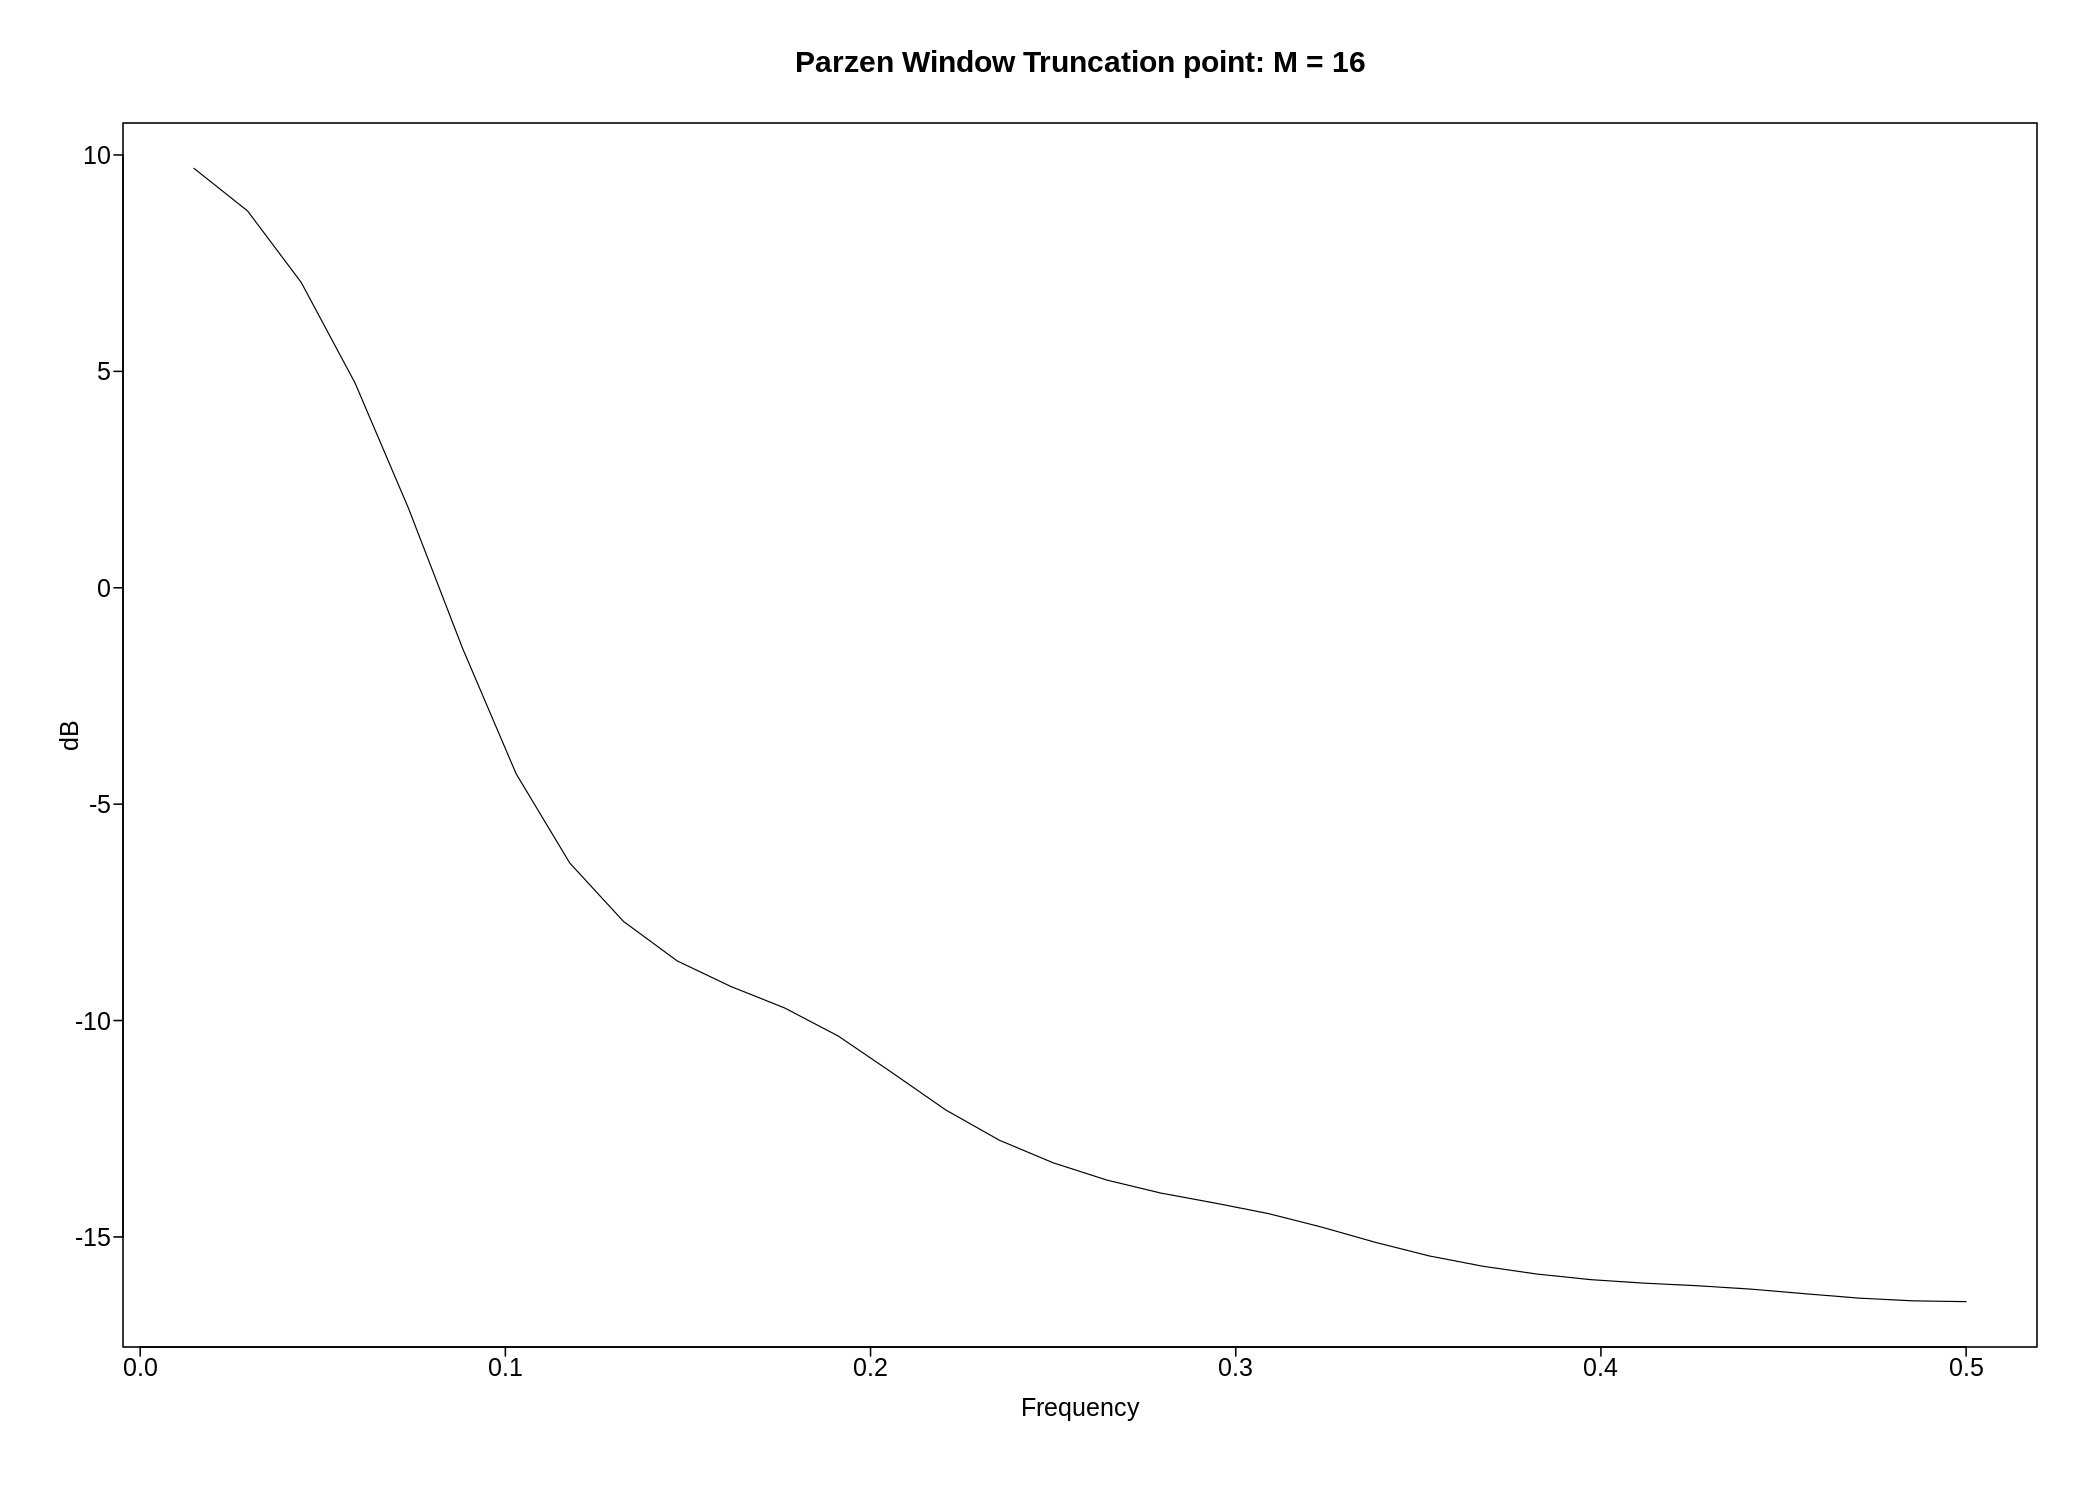

In [23]:
parzen.wge(mei.df$YEAR,trunc=0)

# **Conclusions**

I used most of the code that was given to us through the course notebooks in order to get a lot of the data pre-processed for graphing. Then, I was able to one-by-one get each element of the graph onto the output as I needed it to be. As such I produced graphs that are very similar to the ones that are in the article. A lot of this took trial and error but also having to understand what data we need, such as what years and what subsets. I then created graphs that displayed things such as the periodograms, sampleautocorrelations, and parzen windows to show up for the datasets. The order is pretty self-explanatory, starting with collecting the data for the datasets, then producing the outputs (graphs and such) afterwards, to make each section more compiled.

A big lot of what came from this project was figuring out how to make the graphs, and then analyzing them at the end to see how they point to one another. Many bugs in not being able to show graphs or not getting what I wanted obstructed my ability to effectively produce results in this lab.

Though, after I've created the graphs, I think while I could make conclusions about them, I don't think I've created necessarily the right ones. I do think that spending more time understanding basic concepts should help me enhance my grip on this kind of information and be able to better decide and display what would be useful. Overall, having to juggle between concept understanding, R syntax, and code errors made this lab a lot more difficult to see the bigger picture of things than what the initial report already had (in the article).

## **References**

Works Cited

1. Lam, Holly Ching Yu, et al. “Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle.” International Journal of Environmental Research and Public Health, vol. 16, no. 17, 1 Jan. 2019, p. 3146, www.mdpi.com/1660-4601/16/17/3146/htm, 10.3390/ijerph16173146.